In [220]:
import time

t = time.localtime()
s_time = time.strftime("%H:%M:%S", t)
print(s_time)

14:50:41


# Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Reading and Data Inspection

In [221]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [222]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [223]:
# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

In [224]:
telecom = pd.read_csv(r"C:\Users\Ranajoy Bhattacharya\Downloads\telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [225]:
# shape of the dataframe (no. of rows and columns)
telecom.shape

(99999, 226)

In [226]:
# information about the dataframe (columns, counts, datatype)
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [227]:
# describe on the dataframe
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [228]:
# Numerical columns
telecom.describe().columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=214)

In [229]:
# Categorical columns
list(set(telecom.columns) - set(telecom.describe().columns))

['date_of_last_rech_data_7',
 'last_date_of_month_6',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'last_date_of_month_9',
 'date_of_last_rech_9',
 'date_of_last_rech_8',
 'date_of_last_rech_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_data_6',
 'last_date_of_month_7']

In [230]:
#data types of the columns
telecom.dtypes.value_counts()

float64    179
int64       35
object      12
dtype: int64

In [231]:
# Get the aggregate value like, count, size and No of different values for each column
telecom.agg(['count','size','nunique'])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999,99999,98981,98981,98981,99999,99398,98899,98340,99999,99999,99999,99999,96062,96140,94621,92254,96062,96140,94621,92254,96062,96140,94621,92254,96062,96140,94621,92254,96062,96140,94621,92254,96062,96140,94621,92254,96062,96140,94621,92254,96062,96140,94621,92254,96062,96140,94621,92254,96062,96140,94621,92254,96062,96140,94621,92254,96062,96140,94621,92254,96062,96140,94621,92254,96062,96140,94621,92254,96062,96140,94621,92254,96062,96140,94621,92254,96062,96140,94621,92254,99999,99999,99999,99999,96062,96140,94621,92254,96062,96140,94621,92254,96062,96140,94621,92254,96062,96140,94621,92254,96062,96140,94621,

On looking at the unique features on the columns. There are lot of columns with only 1 feature and 2 feature. 

In [232]:
# Nullvalue % on the columns
((telecom.isnull().sum()[telecom.isnull().sum() > 0]/len(telecom)).round(4) * 100).sort_values(ascending=False)

count_rech_3g_6             74.85
fb_user_6                   74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
av_rech_amt_data_6          74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
arpu_3g_6                   74.85
arpu_3g_7                   74.43
count_rech_3g_7             74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
arpu_2g_7                   74.43
night_pck_user_7            74.43
date_of_last_rech_data_7    74.43
fb_user_7                   74.43
total_rech_data_7           74.43
total_rech_data_9           74.08
count_rech_2g_9             74.08
max_rech_data_9             74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
count_rech_3g_9             74.08
night_pck_user_9            74.08
av_rech_amt_data_9          74.08
arpu_2g_9                   74.08
arpu_3g_9     

In [233]:
# Duplicate check
sum(telecom.duplicated())

0

There are in total 99999 records with 226 columns in the House Price Prediction Dataset. There are lots of missing and null values in the dataset. Also it contains the records with the mix of integer, float and object datatype. There are no duplicate values in the dataset

## Data Cleaning

### Missing value Treatment

### Let us take june month data for analysis which are having more than 70% (74.85) of null values

In [234]:
june_null_col = ['count_rech_3g_6',
'fb_user_6',
'date_of_last_rech_data_6',
'count_rech_2g_6',
'night_pck_user_6',
'av_rech_amt_data_6',
'total_rech_data_6',
'arpu_2g_6',
'max_rech_data_6',
'arpu_3g_6']

In [235]:
telecom[june_null_col].head(20)

,count_rech_3g_6,fb_user_6,date_of_last_rech_data_6,count_rech_2g_6,night_pck_user_6,av_rech_amt_data_6,total_rech_data_6,arpu_2g_6,max_rech_data_6,arpu_3g_6
0,1.0,1.0,6/21/2014,0.0,0.0,252.0,1.0,212.17,252.0,212.17
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,6/4/2014,1.0,0.0,56.0,1.0,0.00,56.0,0.00
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
telecom[june_null_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 10 columns):
count_rech_3g_6             25153 non-null float64
fb_user_6                   25153 non-null float64
date_of_last_rech_data_6    25153 non-null object
count_rech_2g_6             25153 non-null float64
night_pck_user_6            25153 non-null float64
av_rech_amt_data_6          25153 non-null float64
total_rech_data_6           25153 non-null float64
arpu_2g_6                   25153 non-null float64
max_rech_data_6             25153 non-null float64
arpu_3g_6                   25153 non-null float64
dtypes: float64(9), object(1)
memory usage: 7.6+ MB


From the above information, except date field all others columns have float as data type

### Impute the zeros for the rows having nulls in same index

As of now let us try to do imputation as we need to filter out high value customers and in later part exercise based on the importance of the column we can drop the ones which are less significant

#### Index check and zero imputation for the columns in month 6

In [237]:
arpu_2g_6_idx = telecom['arpu_2g_6'].isnull()
arpu_3g_6_idx = telecom['arpu_3g_6'].isnull()
av_rech_amt_data_6_idx = telecom['av_rech_amt_data_6'].isnull()
count_rech_2g_6_idx = telecom['count_rech_2g_6'].isnull()
count_rech_3g_6_idx = telecom['count_rech_3g_6'].isnull()
date_of_last_rech_data_6_idx = telecom['date_of_last_rech_data_6'].isnull()
fb_user_6_idx = telecom['fb_user_6'].isnull()
max_rech_data_6_idx = telecom['max_rech_data_6'].isnull()
night_pck_user_6_idx = telecom['night_pck_user_6'].isnull()
total_rech_data_6_idx = telecom['total_rech_data_6'].isnull()

In [238]:
if total_rech_data_6_idx.equals(arpu_2g_6_idx) :
    if total_rech_data_6_idx.equals(arpu_3g_6_idx) :
        if total_rech_data_6_idx.equals(av_rech_amt_data_6_idx) :
            if total_rech_data_6_idx.equals(count_rech_2g_6_idx) :
                if total_rech_data_6_idx.equals(count_rech_3g_6_idx) :
                    if total_rech_data_6_idx.equals(date_of_last_rech_data_6_idx) :
                        if total_rech_data_6_idx.equals(fb_user_6_idx) :
                            if total_rech_data_6_idx.equals(max_rech_data_6_idx) :
                                if total_rech_data_6_idx.equals(night_pck_user_6_idx) :       
                                    print('The indexes for NULL values for month 6 are equal so we are imputing the numerical columns with zeroes')
                                    
                                                                      

The indexes for NULL values for month 6 are equal so we are imputing the numerical columns with zeroes


In [239]:
telecom['arpu_2g_6'].fillna(0, inplace=True)
telecom['arpu_3g_6'].fillna(0, inplace=True)
telecom['av_rech_amt_data_6'].fillna(0, inplace=True)
telecom['count_rech_2g_6'].fillna(0, inplace=True)
telecom['count_rech_3g_6'].fillna(0, inplace=True)
telecom['fb_user_6'].fillna(0, inplace=True)
telecom['max_rech_data_6'].fillna(0, inplace=True)
telecom['night_pck_user_6'].fillna(0, inplace=True)
telecom['total_rech_data_6'].fillna(0, inplace=True)

### Let us do the similar kind of operation for the months 7 , 8 and 9 as the KPI are same and having more than 70% null values (July - 74.43%, August - 73.66% , September - 74.08%)

#### Index check and zero imputation for the columns in month 7

In [240]:
arpu_2g_7_idx = telecom['arpu_2g_7'].isnull()
arpu_3g_7_idx = telecom['arpu_3g_7'].isnull()
av_rech_amt_data_7_idx = telecom['av_rech_amt_data_7'].isnull()
count_rech_2g_7_idx = telecom['count_rech_2g_7'].isnull()
count_rech_3g_7_idx = telecom['count_rech_3g_7'].isnull()
date_of_last_rech_data_7_idx = telecom['date_of_last_rech_data_7'].isnull()
fb_user_7_idx = telecom['fb_user_7'].isnull()
max_rech_data_7_idx = telecom['max_rech_data_7'].isnull()
night_pck_user_7_idx = telecom['night_pck_user_7'].isnull()
total_rech_data_7_idx = telecom['total_rech_data_7'].isnull()

In [241]:
if total_rech_data_7_idx.equals(arpu_2g_7_idx) :
    if total_rech_data_7_idx.equals(arpu_3g_7_idx) :
        if total_rech_data_7_idx.equals(av_rech_amt_data_7_idx) :
            if total_rech_data_7_idx.equals(count_rech_2g_7_idx) :
                if total_rech_data_7_idx.equals(count_rech_3g_7_idx) :
                    if total_rech_data_7_idx.equals(date_of_last_rech_data_7_idx) :
                        if total_rech_data_7_idx.equals(fb_user_7_idx) :
                            if total_rech_data_7_idx.equals(max_rech_data_7_idx) :
                                if total_rech_data_7_idx.equals(night_pck_user_7_idx) :       
                                    print('The indexes for NULL values for month 7 are equal so we are imputing the numerical columns with zeroes')

The indexes for NULL values for month 7 are equal so we are imputing the numerical columns with zeroes


In [242]:
telecom['arpu_2g_7'].fillna(0, inplace=True)
telecom['arpu_3g_7'].fillna(0, inplace=True)
telecom['av_rech_amt_data_7'].fillna(0, inplace=True)
telecom['count_rech_2g_7'].fillna(0, inplace=True)
telecom['count_rech_3g_7'].fillna(0, inplace=True)
telecom['fb_user_7'].fillna(0, inplace=True)
telecom['max_rech_data_7'].fillna(0, inplace=True)
telecom['night_pck_user_7'].fillna(0, inplace=True)
telecom['total_rech_data_7'].fillna(0, inplace=True)

#### Index check and zero imputation for the columns in month 8

In [243]:
arpu_2g_8_idx = telecom['arpu_2g_8'].isnull()
arpu_3g_8_idx = telecom['arpu_3g_8'].isnull()
av_rech_amt_data_8_idx = telecom['av_rech_amt_data_8'].isnull()
count_rech_2g_8_idx = telecom['count_rech_2g_8'].isnull()
count_rech_3g_8_idx = telecom['count_rech_3g_8'].isnull()
date_of_last_rech_data_8_idx = telecom['date_of_last_rech_data_8'].isnull()
fb_user_8_idx = telecom['fb_user_8'].isnull()
max_rech_data_8_idx = telecom['max_rech_data_8'].isnull()
night_pck_user_8_idx = telecom['night_pck_user_8'].isnull()
total_rech_data_8_idx = telecom['total_rech_data_8'].isnull()

In [244]:
if total_rech_data_8_idx.equals(arpu_2g_8_idx) :
    if total_rech_data_8_idx.equals(arpu_3g_8_idx) :
        if total_rech_data_8_idx.equals(av_rech_amt_data_8_idx) :
            if total_rech_data_8_idx.equals(count_rech_2g_8_idx) :
                if total_rech_data_8_idx.equals(count_rech_3g_8_idx) :
                    if total_rech_data_8_idx.equals(date_of_last_rech_data_8_idx) :
                        if total_rech_data_8_idx.equals(fb_user_8_idx) :
                            if total_rech_data_8_idx.equals(max_rech_data_8_idx) :
                                if total_rech_data_8_idx.equals(night_pck_user_8_idx) :       
                                    print('The indexes for NULL values for month 8 are equal so we are imputing the numerical columns with zeroes')

The indexes for NULL values for month 8 are equal so we are imputing the numerical columns with zeroes


In [245]:
telecom['arpu_2g_8'].fillna(0, inplace=True)
telecom['arpu_3g_8'].fillna(0, inplace=True)
telecom['av_rech_amt_data_8'].fillna(0, inplace=True)
telecom['count_rech_2g_8'].fillna(0, inplace=True)
telecom['count_rech_3g_8'].fillna(0, inplace=True)
telecom['fb_user_8'].fillna(0, inplace=True)
telecom['max_rech_data_8'].fillna(0, inplace=True)
telecom['night_pck_user_8'].fillna(0, inplace=True)
telecom['total_rech_data_8'].fillna(0, inplace=True)

#### Index check and zero imputation for the columns in month 9

In [246]:
arpu_2g_9_idx = telecom['arpu_2g_9'].isnull()
arpu_3g_9_idx = telecom['arpu_3g_9'].isnull()
av_rech_amt_data_9_idx = telecom['av_rech_amt_data_9'].isnull()
count_rech_2g_9_idx = telecom['count_rech_2g_9'].isnull()
count_rech_3g_9_idx = telecom['count_rech_3g_9'].isnull()
date_of_last_rech_data_9_idx = telecom['date_of_last_rech_data_9'].isnull()
fb_user_9_idx = telecom['fb_user_9'].isnull()
max_rech_data_9_idx = telecom['max_rech_data_9'].isnull()
night_pck_user_9_idx = telecom['night_pck_user_9'].isnull()
total_rech_data_9_idx = telecom['total_rech_data_9'].isnull()

In [247]:
if total_rech_data_9_idx.equals(arpu_2g_9_idx) :
    if total_rech_data_9_idx.equals(arpu_3g_9_idx) :
        if total_rech_data_9_idx.equals(av_rech_amt_data_9_idx) :
            if total_rech_data_9_idx.equals(count_rech_2g_9_idx) :
                if total_rech_data_9_idx.equals(count_rech_3g_9_idx) :
                    if total_rech_data_9_idx.equals(date_of_last_rech_data_9_idx) :
                        if total_rech_data_9_idx.equals(fb_user_9_idx) :
                            if total_rech_data_9_idx.equals(max_rech_data_9_idx) :
                                if total_rech_data_9_idx.equals(night_pck_user_9_idx) :       
                                    print('The indexes for NULL values for month 9 are equal so we are imputing the numerical columns with zeroes')

The indexes for NULL values for month 9 are equal so we are imputing the numerical columns with zeroes


In [248]:
telecom['arpu_2g_9'].fillna(0, inplace=True)
telecom['arpu_3g_9'].fillna(0, inplace=True)
telecom['av_rech_amt_data_9'].fillna(0, inplace=True)
telecom['count_rech_2g_9'].fillna(0, inplace=True)
telecom['count_rech_3g_9'].fillna(0, inplace=True)
telecom['fb_user_9'].fillna(0, inplace=True)
telecom['max_rech_data_9'].fillna(0, inplace=True)
telecom['night_pck_user_9'].fillna(0, inplace=True)
telecom['total_rech_data_9'].fillna(0, inplace=True)

#### Check on Null Values for other columns and impute with relevant data

In [249]:
# Nullvalue % on the columns
((telecom.isnull().sum()[telecom.isnull().sum() > 0]/len(telecom)).round(4) * 100).sort_values(ascending=False)


date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
loc_ic_mou_9                 7.75
loc_og_t2f_mou_9             7.75
loc_og_t2c_mou_9             7.75
std_ic_t2o_mou_9             7.75
loc_ic_t2t_mou_9             7.75
loc_og_mou_9                 7.75
std_ic_t2f_mou_9             7.75
isd_og_mou_9                 7.75
std_og_t2t_mou_9             7.75
std_og_mou_9                 7.75
std_og_t2m_mou_9             7.75
std_ic_t2m_mou_9             7.75
std_og_t2f_mou_9             7.75
std_ic_mou_9                 7.75
loc_og_t2m_mou_9             7.75
std_ic_t2t_mou_9             7.75
spl_og_mou_9                 7.75
loc_ic_t2m_mou_9             7.75
onnet_mou_9                  7.75
og_others_9                  7.75
offnet_mou_9                 7.75
ic_others_9                  7.75
roam_ic_mou_9                7.75
isd_ic_mou_9                 7.75
roam_og_mou_9                7.75
loc_ic_t2f_mou

In [250]:
ic_isd_og = ['ic_others_6','ic_others_7','ic_others_8','ic_others_9','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','isd_ic_mou_9',
'isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','isd_og_mou_9','og_others_6','og_others_7','og_others_8','og_others_9']

In [251]:
telecom[ic_isd_og].head()

,ic_others_6,ic_others_7,ic_others_8,ic_others_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9
0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
1,0.00,0.00,0.0,0.00,1.83,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2,0.93,3.14,0.0,0.36,0.00,0.85,0.0,0.01,0.0,0.0,0.0,0.0,0.45,0.0,0.0,0.0
3,0.00,0.00,0.0,0.80,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,0.48,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [252]:
telecom[ic_isd_og].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 16 columns):
ic_others_6     96062 non-null float64
ic_others_7     96140 non-null float64
ic_others_8     94621 non-null float64
ic_others_9     92254 non-null float64
isd_ic_mou_6    96062 non-null float64
isd_ic_mou_7    96140 non-null float64
isd_ic_mou_8    94621 non-null float64
isd_ic_mou_9    92254 non-null float64
isd_og_mou_6    96062 non-null float64
isd_og_mou_7    96140 non-null float64
isd_og_mou_8    94621 non-null float64
isd_og_mou_9    92254 non-null float64
og_others_6     96062 non-null float64
og_others_7     96140 non-null float64
og_others_8     94621 non-null float64
og_others_9     92254 non-null float64
dtypes: float64(16)
memory usage: 12.2 MB


Here null value means there have not done any recharge to receive or do calls. So it is better to impute null values with zeroes instead of mean/median

In [253]:
for i in ic_isd_og:
    telecom[i].fillna(0, inplace=True)

In [254]:
loc_ic_og = ['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','loc_ic_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7',
             'loc_ic_t2f_mou_8','loc_ic_t2f_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
             'loc_ic_t2m_mou_9','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8',
             'loc_ic_t2t_mou_9','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','loc_og_mou_9','loc_og_t2c_mou_6',
             'loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_t2c_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7',
             'loc_og_t2f_mou_8','loc_og_t2f_mou_9','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8',
             'loc_og_t2m_mou_9','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8',
             'loc_og_t2t_mou_9','loc_ic_t2o_mou','loc_og_t2o_mou']

In [255]:
telecom[loc_ic_og].head()

,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_ic_t2o_mou,loc_og_t2o_mou
0,NaN,NaN,5.44,NaN,NaN,NaN,1.15,NaN,NaN,NaN,4.13,NaN,NaN,NaN,0.16,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.0,0.0
1,19.09,104.23,408.43,173.03,0.00,8.93,3.61,0.00,17.48,65.38,375.58,56.93,1.61,29.91,29.23,116.09,35.39,150.51,299.54,72.11,0.0,2.91,0.00,0.00,0.00,0.00,0.00,0.00,11.51,75.94,291.86,53.76,23.88,74.56,7.68,18.34,0.0,0.0
2,229.56,208.86,155.99,345.41,99.48,122.29,49.63,158.19,14.38,15.44,38.89,38.98,115.69,71.11,67.46,148.23,60.66,67.41,67.66,64.81,0.0,135.54,45.76,0.48,24.11,21.79,15.61,22.24,29.34,16.86,38.46,28.16,7.19,28.74,13.58,14.39,0.0,0.0
3,233.48,111.59,48.18,160.19,57.43,27.09,19.84,65.59,113.96,64.51,20.28,52.86,62.08,19.98,8.04,41.73,183.03,118.68,37.99,83.03,0.0,0.00,0.00,0.00,1.91,0.65,4.91,2.06,107.43,83.21,22.46,65.46,73.68,34.81,10.61,15.49,0.0,0.0
4,214.03,198.04,337.94,202.81,1.50,0.00,0.00,0.00,106.84,109.54,104.13,48.24,105.68,88.49,233.81,154.56,117.96,241.33,208.16,98.61,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.93,67.64,91.88,124.26,37.89,50.31,149.44,83.89,58.78,0.0,0.0


In [256]:
telecom[loc_ic_og].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 38 columns):
loc_ic_mou_6        96062 non-null float64
loc_ic_mou_7        96140 non-null float64
loc_ic_mou_8        94621 non-null float64
loc_ic_mou_9        92254 non-null float64
loc_ic_t2f_mou_6    96062 non-null float64
loc_ic_t2f_mou_7    96140 non-null float64
loc_ic_t2f_mou_8    94621 non-null float64
loc_ic_t2f_mou_9    92254 non-null float64
loc_ic_t2m_mou_6    96062 non-null float64
loc_ic_t2m_mou_7    96140 non-null float64
loc_ic_t2m_mou_8    94621 non-null float64
loc_ic_t2m_mou_9    92254 non-null float64
loc_ic_t2t_mou_6    96062 non-null float64
loc_ic_t2t_mou_7    96140 non-null float64
loc_ic_t2t_mou_8    94621 non-null float64
loc_ic_t2t_mou_9    92254 non-null float64
loc_og_mou_6        96062 non-null float64
loc_og_mou_7        96140 non-null float64
loc_og_mou_8        94621 non-null float64
loc_og_mou_9        92254 non-null float64
loc_og_t2c_mou_6    96062 non-n

Here null value means there have not done any recharge to receive or do calls. So it is better to impute null values with zeroes instead of mean/median

In [257]:
for i in loc_ic_og:
    telecom[i].fillna(0, inplace=True)

In [258]:
offnet_onnet_roam_spl = ['offnet_mou_6','offnet_mou_7','offnet_mou_8','offnet_mou_9','onnet_mou_6','onnet_mou_7','onnet_mou_8',
                         'onnet_mou_9','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_ic_mou_9','roam_og_mou_6',
                         'roam_og_mou_7','roam_og_mou_8','roam_og_mou_9','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8',
                         'spl_ic_mou_9','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','spl_og_mou_9']


In [259]:
telecom[offnet_onnet_roam_spl].head()

,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9
0,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN
1,15.74,99.84,304.76,53.76,24.11,78.68,7.68,18.34,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,4.68,23.43,12.76,0.00
2,143.33,220.59,208.36,118.91,11.54,55.24,37.26,74.81,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,0.21,0.0,0.0,0.45,46.56,236.84,96.84,42.08
3,123.31,109.01,71.68,113.54,99.91,54.39,310.98,241.71,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,0.59,0.0,0.0,0.55,10.96,0.00,18.09,43.29
4,76.96,91.88,124.26,45.81,50.31,149.44,83.89,58.78,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.18,0.00,0.00,0.00,5.98


In [260]:
telecom[offnet_onnet_roam_spl].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 24 columns):
offnet_mou_6     96062 non-null float64
offnet_mou_7     96140 non-null float64
offnet_mou_8     94621 non-null float64
offnet_mou_9     92254 non-null float64
onnet_mou_6      96062 non-null float64
onnet_mou_7      96140 non-null float64
onnet_mou_8      94621 non-null float64
onnet_mou_9      92254 non-null float64
roam_ic_mou_6    96062 non-null float64
roam_ic_mou_7    96140 non-null float64
roam_ic_mou_8    94621 non-null float64
roam_ic_mou_9    92254 non-null float64
roam_og_mou_6    96062 non-null float64
roam_og_mou_7    96140 non-null float64
roam_og_mou_8    94621 non-null float64
roam_og_mou_9    92254 non-null float64
spl_ic_mou_6     96062 non-null float64
spl_ic_mou_7     96140 non-null float64
spl_ic_mou_8     94621 non-null float64
spl_ic_mou_9     92254 non-null float64
spl_og_mou_6     96062 non-null float64
spl_og_mou_7     96140 non-null float64
spl_og_mou_

Here null value means there have not done any recharge to receive or do calls. So it is better to impute null values with zeroes instead of mean/median

In [261]:
for i in offnet_onnet_roam_spl:
    telecom[i].fillna(0, inplace=True)

In [262]:
std_ic_og = ['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','std_ic_mou_9','std_ic_t2f_mou_6','std_ic_t2f_mou_7',
             'std_ic_t2f_mou_8','std_ic_t2f_mou_9','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9',
             'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9','std_ic_t2t_mou_6','std_ic_t2t_mou_7',
             'std_ic_t2t_mou_8','std_ic_t2t_mou_9','std_og_mou_6','std_og_mou_7','std_og_mou_8','std_og_mou_9',
             'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_og_t2f_mou_6','std_og_t2f_mou_7',
             'std_og_t2f_mou_8','std_og_t2f_mou_9','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9',
             'std_og_t2o_mou','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9']

In [263]:
telecom[std_ic_og].head()

,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2o_mou,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9
0,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.0,NaN,NaN,0.00,NaN
1,5.90,0.00,14.84,15.01,0.00,0.00,0.00,0.00,5.90,0.00,12.49,15.01,0.0,0.0,0.0,0.0,0.00,0.00,2.35,0.00,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.46,0.13,0.00,0.0,0.23,4.11,0.00,0.00
2,139.33,306.66,239.03,171.49,21.73,58.34,43.23,3.86,45.18,177.01,167.09,118.18,0.0,0.0,0.0,0.0,72.41,71.29,28.69,49.44,47.64,108.68,120.94,18.04,0.0,0.0,0.0,0.0,1.48,14.76,22.83,0.0,41.81,67.41,75.53,9.28,0.0,4.34,26.49,22.58,8.76
3,45.99,105.01,4.94,143.83,1.18,0.00,0.00,0.00,1.33,38.56,4.94,13.98,0.0,0.0,0.0,0.0,43.48,66.44,0.00,129.84,29.23,16.63,296.11,236.21,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,2.99,1.73,6.53,9.99,0.0,26.23,14.89,289.58,226.21
4,1.93,0.25,0.86,2.31,0.00,0.00,0.00,0.00,1.93,0.25,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.86,2.31,9.31,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,9.31,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00


In [264]:
telecom[std_ic_og].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 41 columns):
std_ic_mou_6        96062 non-null float64
std_ic_mou_7        96140 non-null float64
std_ic_mou_8        94621 non-null float64
std_ic_mou_9        92254 non-null float64
std_ic_t2f_mou_6    96062 non-null float64
std_ic_t2f_mou_7    96140 non-null float64
std_ic_t2f_mou_8    94621 non-null float64
std_ic_t2f_mou_9    92254 non-null float64
std_ic_t2m_mou_6    96062 non-null float64
std_ic_t2m_mou_7    96140 non-null float64
std_ic_t2m_mou_8    94621 non-null float64
std_ic_t2m_mou_9    92254 non-null float64
std_ic_t2o_mou_6    96062 non-null float64
std_ic_t2o_mou_7    96140 non-null float64
std_ic_t2o_mou_8    94621 non-null float64
std_ic_t2o_mou_9    92254 non-null float64
std_ic_t2t_mou_6    96062 non-null float64
std_ic_t2t_mou_7    96140 non-null float64
std_ic_t2t_mou_8    94621 non-null float64
std_ic_t2t_mou_9    92254 non-null float64
std_og_mou_6        96062 non-n

Here null value means there have not done any recharge to receive or do calls. So it is better to impute null values with zeroes instead of mean/median

In [265]:
for i in std_ic_og:
    telecom[i].fillna(0, inplace=True)

In [266]:
# Nullvalue % on the columns
((telecom.isnull().sum()[telecom.isnull().sum() > 0]/len(telecom)).round(4) * 100).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
date_of_last_rech_9          4.76
date_of_last_rech_8          3.62
date_of_last_rech_7          1.77
last_date_of_month_9         1.66
date_of_last_rech_6          1.61
last_date_of_month_8         1.10
last_date_of_month_7         0.60
dtype: float64

#### Date values are not going to provide much significance so let us drop them

In [267]:
date_col = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9',
            'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
            'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']

In [268]:
telecom.drop(date_col, axis = 1, inplace = True)

In [269]:
telecom.shape

(99999, 214)

In [270]:
# Nullvalue % on the columns
((telecom.isnull().sum()[telecom.isnull().sum() > 0]/len(telecom)).round(4) * 100).sort_values(ascending=False)

Series([], dtype: float64)

#### Now the data is clean without having any values

## Data Preparation

### Derivation of New variables

In [271]:
# Calculate recharge amount for data using the two columns (telecom.total_rech_data_* & telecom.av_rech_amt_data_*)
telecom['total_data_rech_amt_6'] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom['total_data_rech_amt_7'] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7
telecom['total_data_rech_amt_8'] = telecom.total_rech_data_8 * telecom.av_rech_amt_data_8
telecom['total_data_rech_amt_9'] = telecom.total_rech_data_9 * telecom.av_rech_amt_data_9

In [272]:
# Calculate Total recharge amount for Calls & Data for the months June & July
telecom['avg_total_amt_6'] = (telecom['total_rech_amt_6'] + telecom['total_data_rech_amt_6'])/2
telecom['avg_total_amt_7'] = (telecom['total_rech_amt_7'] + telecom['total_data_rech_amt_7'])/2

### Filtering of high value customers

High-value customers are those who have recharged with an amount more than or equal to 70th percentile of the average recharge amount in the first two months (the good phase i.e June and July).

In [273]:
# Calculate average recharge amount for June and July
telecom['avg_tot_rech_amt_6_7'] = (telecom['avg_total_amt_6'] + telecom['avg_total_amt_7'])/2

In [274]:
amt_70th_ptile = np.percentile(telecom['avg_tot_rech_amt_6_7'], 70)
print ('The filtering value for High Value Customer is : ',amt_70th_ptile)

The filtering value for High Value Customer is :  239.0


As new features are derived we can drop the original columns 

In [275]:
telecom.drop(['total_rech_data_6','av_rech_amt_data_6','total_rech_data_7','av_rech_amt_data_7',
             'total_rech_data_8','av_rech_amt_data_8','total_rech_data_9','av_rech_amt_data_9',
             'total_rech_amt_6','total_rech_amt_7'], axis = 1, inplace = True)

In [276]:
telecom.shape

(99999, 211)

In [277]:
telecom_hvc = telecom[telecom['avg_tot_rech_amt_6_7'] >= amt_70th_ptile]

In [278]:
telecom_hvc.shape

(30001, 211)

After filtering out the High Value Customers using 70th percentile value, we have 30K rows remaining. Let us proceed with this High Value Customer data for further analysis

### Derving Churn using September month data

Churned customers (churn=1, else 0) based on the fourth month are those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase

In [279]:
# Let us reset the index for the telecom_hvc dataset 
telecom_hvc = telecom_hvc.reset_index(drop=True)

In [280]:
telecom_hvc['churn'] = telecom_hvc.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & 
                                                          (x.total_og_mou_9 == 0) and 
                                                          (x.vol_2g_mb_9 == 0) and 
                                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [281]:
# Let us ensure few records on the churn value
telecom_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,0.00,0.00,0.00,0.00,1
1,0.00,0.00,0.00,0.00,1
2,34.91,142.18,0.00,0.00,0
3,252.61,1031.53,0.00,0.00,0
4,127.48,127.63,13.93,314.74,0


### Rename few of the features per usual standards

In [282]:
telecom_hvc.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                               'jul_vbc_3g':'vbc_3g_7',
                               'aug_vbc_3g':'vbc_3g_8',
                               'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

### Delete September month data from High Value Customer dataset as Churn feature is derived 

In [283]:
cols_with_9 = [i for i in telecom_hvc.columns if '_9' in i]
cols_with_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'vbc_3g_9',
 'total_data_rech_amt_9']

In [284]:
len(cols_with_9)

51

There are 50 columns in September month data, we need to drop 50 columns. Earlier we dropped few of the columns while deriving new features

In [285]:
telecom_hvc.shape

(30001, 212)

In [286]:
telecom_hvc.drop(cols_with_9, axis=1, inplace = True)

In [287]:
telecom_hvc.shape

(30001, 161)

In [288]:
telecom_hvc.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7',
       ...
       'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'total_data_rech_amt_6',
       'total_data_rech_amt_7', 'total_data_rech_amt_8', 'avg_total_amt_6',
       'avg_total_amt_7', 'avg_tot_rech_amt_6_7', 'churn'],
      dtype='object', length=161)

In [289]:
sum(telecom_hvc.duplicated(subset = 'mobile_number')) == 0

True

The column mobile_number seems to be the number column without any duplicate values and so let us drop the column

In [290]:
telecom_hvc.drop(['mobile_number'], axis=1, inplace = True)

In [291]:
telecom_hvc.shape

(30001, 160)

### Churn percentage

In [292]:
churn = round((sum(telecom_hvc['churn'])/len(telecom_hvc['churn'].index))*100,2)
print('Churn percentage is : ',churn,'%')

Churn percentage is :  8.14 %


## Exploratory Data Analysis

In [293]:
# Categorical columns
list(set(telecom_hvc.columns) - set(telecom_hvc.describe().columns))

[]

There were no Categorical columns in the dataset

### Single Value Columns

In [294]:
one_val_col = []

for col in list(telecom_hvc.columns):
    if (telecom_hvc[col].unique().size == 1):
        one_val_col.append(col)
        
print(one_val_col,len(one_val_col))

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'] 10


In [295]:
telecom_hvc[one_val_col].head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As there are only one for the columns, these are not going to provide any significance so let us drop them

In [296]:
telecom_hvc.shape

(30001, 160)

In [297]:
telecom_hvc.drop(one_val_col, axis=1, inplace = True)

In [298]:
telecom_hvc.shape

(30001, 150)

### Binary Value Columns

In [299]:
bin_val_col = []

for col in list(telecom_hvc.columns):
    if (telecom_hvc[col].unique().size == 2):
        bin_val_col.append(col)
        
print(bin_val_col)

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']


In [300]:
telecom_hvc[bin_val_col] = telecom_hvc[bin_val_col].astype(int)

telecom_hvc[bin_val_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 7 columns):
night_pck_user_6    30001 non-null int32
night_pck_user_7    30001 non-null int32
night_pck_user_8    30001 non-null int32
fb_user_6           30001 non-null int32
fb_user_7           30001 non-null int32
fb_user_8           30001 non-null int32
churn               30001 non-null int32
dtypes: int32(7)
memory usage: 820.5 KB


In [301]:
bin_val_col.remove('churn')

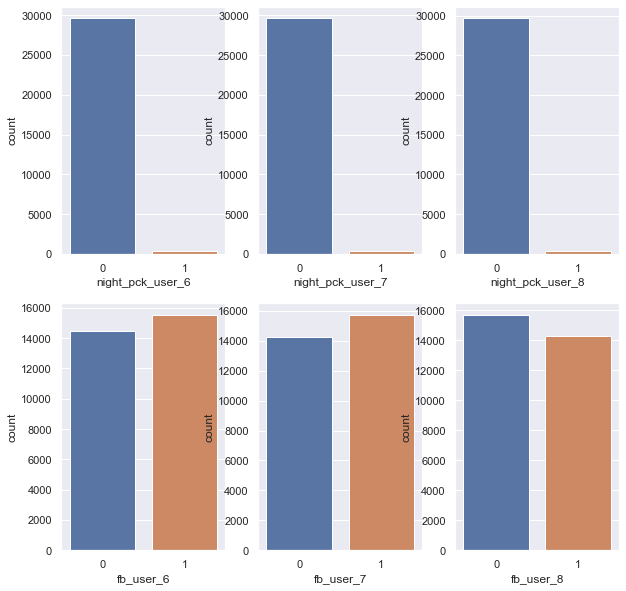

In [302]:
cnt=0
plt.figure(figsize=(10,10))
for i in bin_val_col:
    plt.subplot(2,3,cnt+1)
    sns.countplot(telecom_hvc[i])
    cnt = cnt+1
plt.show()

The Churn percentage for fb users are more when comparing to night pack users

### Outlier Analysis

In [303]:
#data types of the columns
telecom_hvc.dtypes.value_counts()

float64    120
int64       23
int32        7
dtype: int64

In [304]:
num_flt_col =  telecom_hvc.select_dtypes(include=['float64']).columns
print(num_flt_col,len(num_flt_col))

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'arpu_2g_8', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'total_data_rech_amt_6', 'total_data_rech_amt_7',
       'total_data_rech_amt_8', 'avg_total_amt_6', 'avg_total_amt_7',
       'avg_tot_rech_amt_6_7'],
      dtype='object', length=120) 120


In [305]:
num_int1_col =  telecom_hvc.select_dtypes(include=['int64']).columns
print(num_int1_col,len(num_int1_col))

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon'],
      dtype='object') 23


In [306]:
num_int2_col =  telecom_hvc.select_dtypes(include=['int32']).columns
print(num_int2_col,len(num_int2_col))

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'churn'],
      dtype='object') 7


In [307]:
num_cols = num_flt_col.append(num_int1_col)
len(num_cols)

143

#### Analysis for June Month

In [308]:
cols_with_6 = [i for i in num_cols if '_6' in i]
print(cols_with_6,len(cols_with_6))

['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6', 'vbc_3g_6', 'total_data_rech_amt_6', 'avg_total_amt_6', 'avg_tot_rech_amt_6_7', 'total_rech_num_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6'] 48


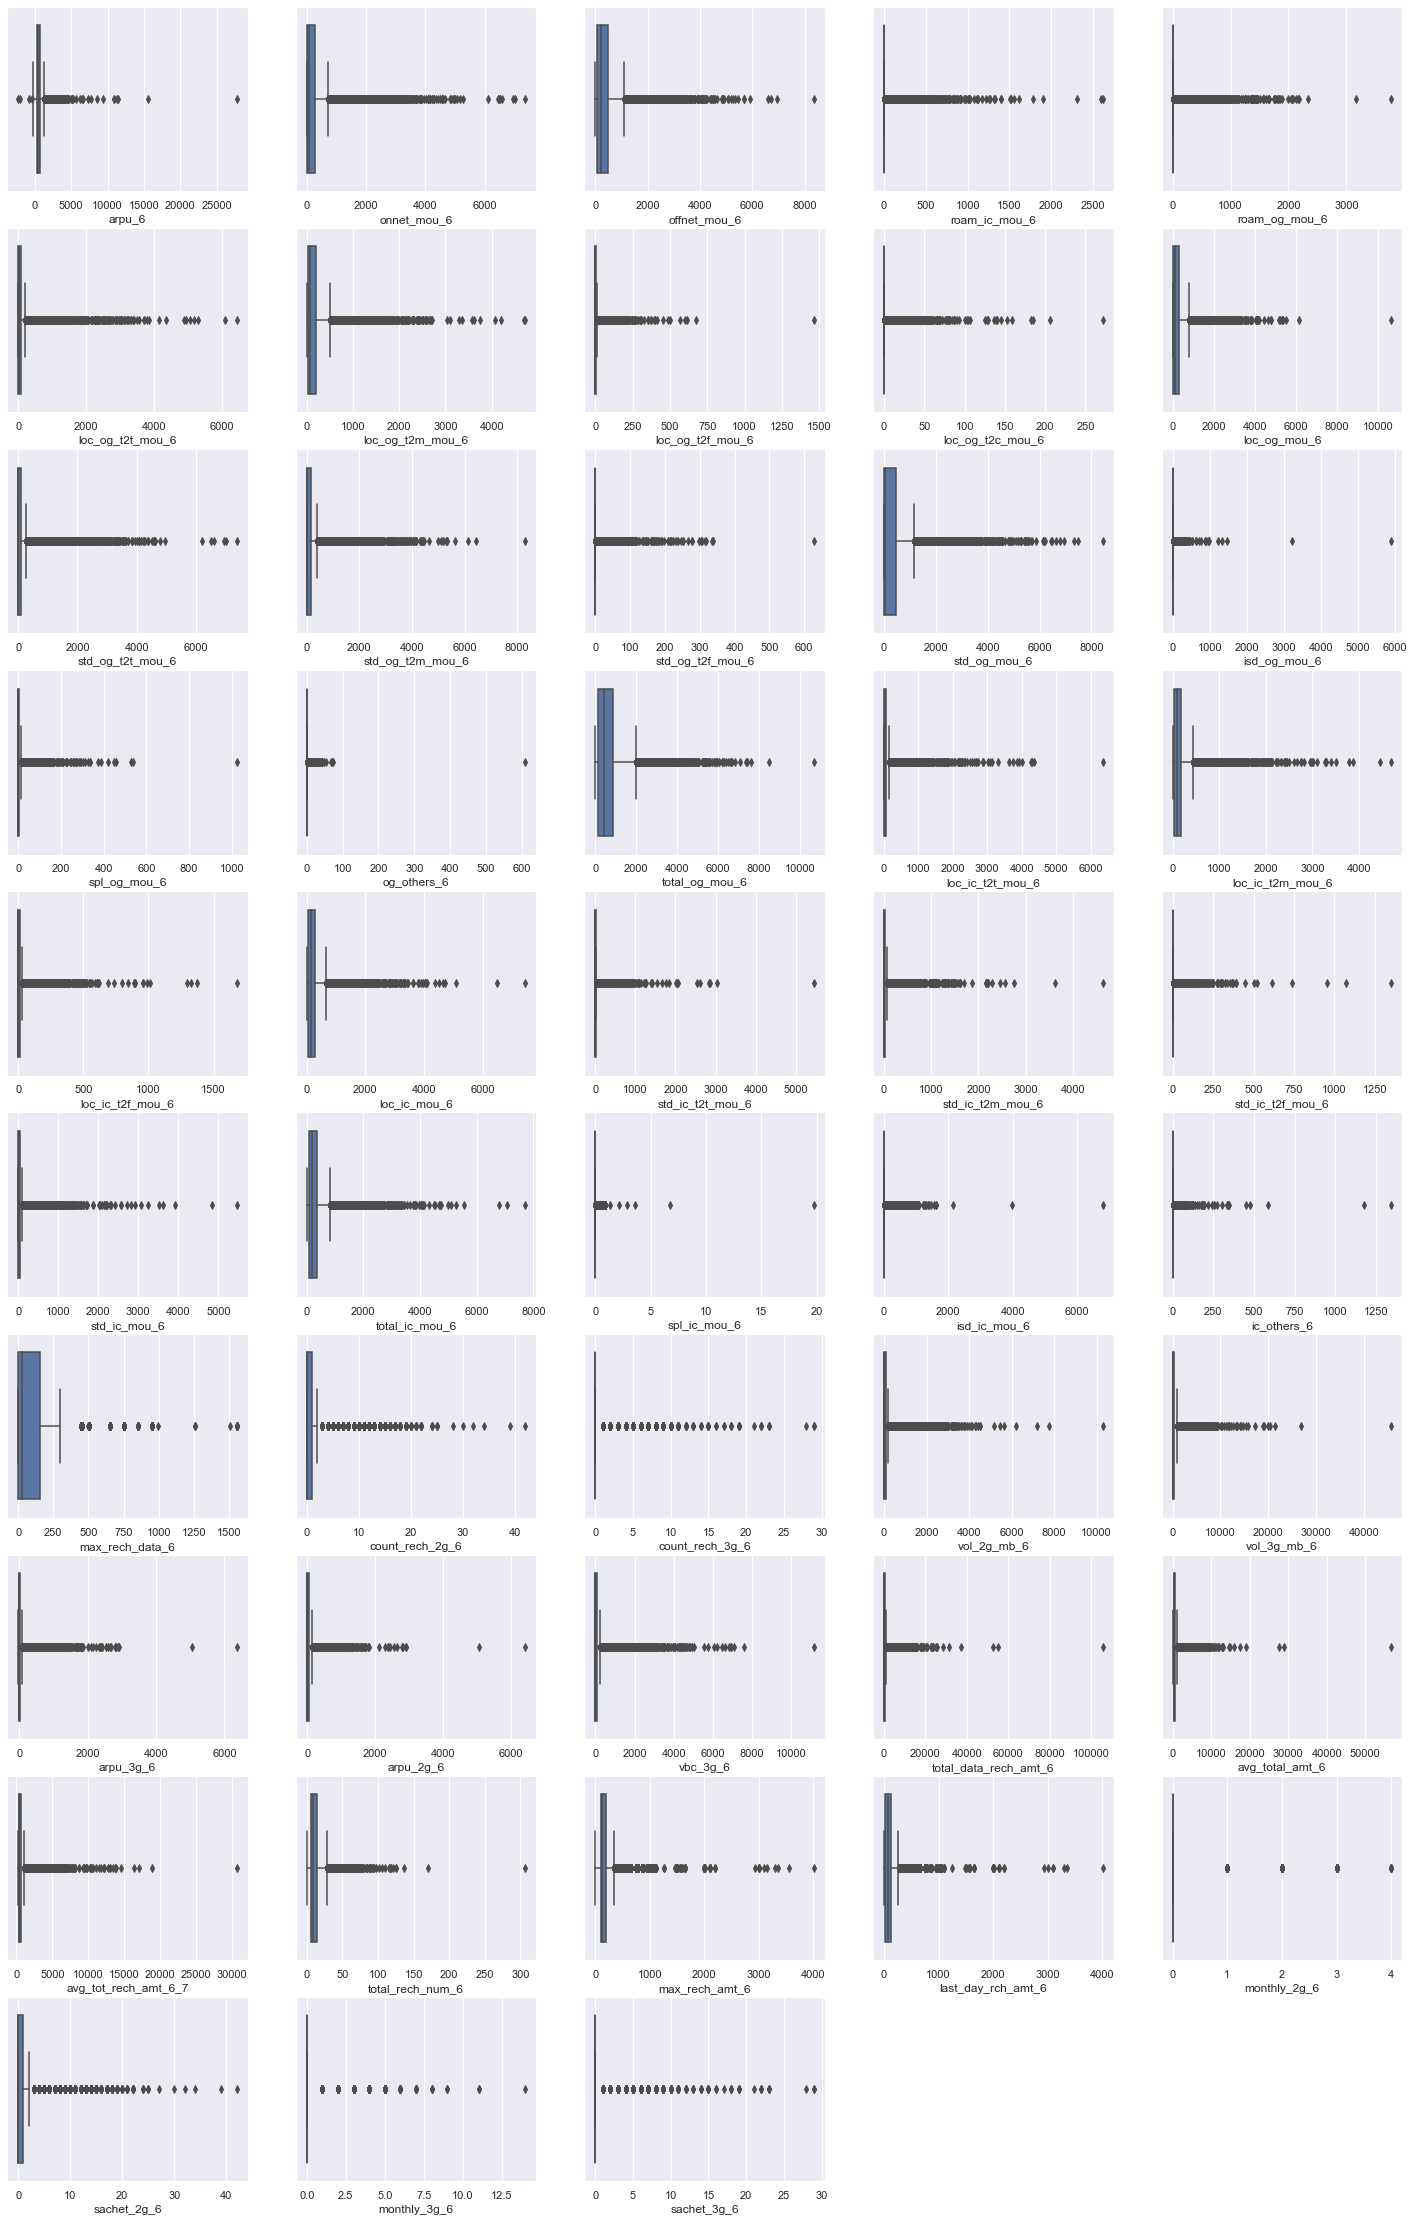

In [309]:
plt.figure(figsize=(25,40))
for i in enumerate(cols_with_6):
    plt.subplot(10,5,i[0]+1)
    sns.boxplot(x = i[1], data =telecom_hvc)
plt.show()

In [310]:
telecom_hvc[cols_with_6].describe()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,vbc_3g_6,total_data_rech_amt_6,avg_total_amt_6,avg_tot_rech_amt_6_7,total_rech_num_6,max_rech_amt_6,last_day_rch_amt_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,260.793024,373.693961,16.110355,26.571547,84.484753,163.243297,6.344115,1.575104,254.080388,165.885296,179.433389,1.803548,347.125955,2.171525,5.818270,0.661092,609.866251,65.453285,150.412393,15.278467,231.153776,14.894779,29.195215,2.695855,46.789434,289.950496,0.061035,10.784689,1.153449,78.079564,1.240559,0.427152,126.522185,344.258568,67.007633,63.439374,158.523962,455.777166,558.254754,576.310314,11.851005,169.284824,100.893604,0.174494,1.066064,0.217759,0.209393
std,460.640461,459.644368,482.523558,76.302156,116.205525,228.794004,250.116700,22.123561,6.303385,378.339061,403.831965,409.025814,11.979429,608.629048,45.852190,17.567237,4.107960,690.873430,163.738880,219.198969,45.751937,314.821196,77.695681,98.210477,19.099927,137.501469,365.523475,0.188058,76.729297,13.985934,112.731468,2.502165,1.167833,330.530793,913.747778,179.161038,161.008235,416.734860,1418.671074,783.056146,679.356991,9.429132,175.315958,143.737572,0.434953,2.507197,0.613199,0.985674
min,-2258.709000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.280000,-15.320000,0.000000,0.000000,0.000000,239.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,309.865000,17.080000,71.610000,0.000000,0.000000,4.380000,19.210000,0.000000,0.000000,32.260000,0.000000,0.000000,0.000000,0.380000,0.000000,0.000000,0.000000,116.580000,6.090000,28.080000,0.000000,47.880000,0.000000,0.000000,0.000000,1.030000,72.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,273.000000,301.500000,6.000000,110.000000,25.000000,0.000000,0.000000,0.000000,0.000000
50%,481.694000,84.580000,222.540000,0.000000,0.000000,24.330000,77.180000,0.000000,0.000000,124.540000,2.710000,16.360000,0.000000,45.130000,0.000000,0.210000,0.000000,410.630000,25.080000,84.060000,1.840000,134.490000,0.380000,5.000000,0.000000,11.410000,183.730000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.000000,394.000000,400.000000,9.000000,120.000000,67.000000,0.000000,0.000000,0.000000,0.000000
75%,699.943000,290.440000,487.940000,0.000000,0.000000,77.980000,208.930000,4.230000,0.000000,332.090000,109.610000,154.540000,0.000000,465.390000,0.000000,5.210000,0.000000,858.760000,67.430000,188.710000,11.980000,297.140000,8.200000,23.600000,0.110000,41.490000,371.990000,0.000000,0.000000,0.050000,154.00000

#### Analysis for July Month

In [311]:
cols_with_7 = [i for i in num_cols if '_7' in i]
print(cols_with_7,len(cols_with_7))

['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'max_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'arpu_3g_7', 'arpu_2g_7', 'vbc_3g_7', 'total_data_rech_amt_7', 'avg_total_amt_7', 'avg_tot_rech_amt_6_7', 'total_rech_num_7', 'max_rech_amt_7', 'last_day_rch_amt_7', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_7', 'sachet_3g_7'] 48


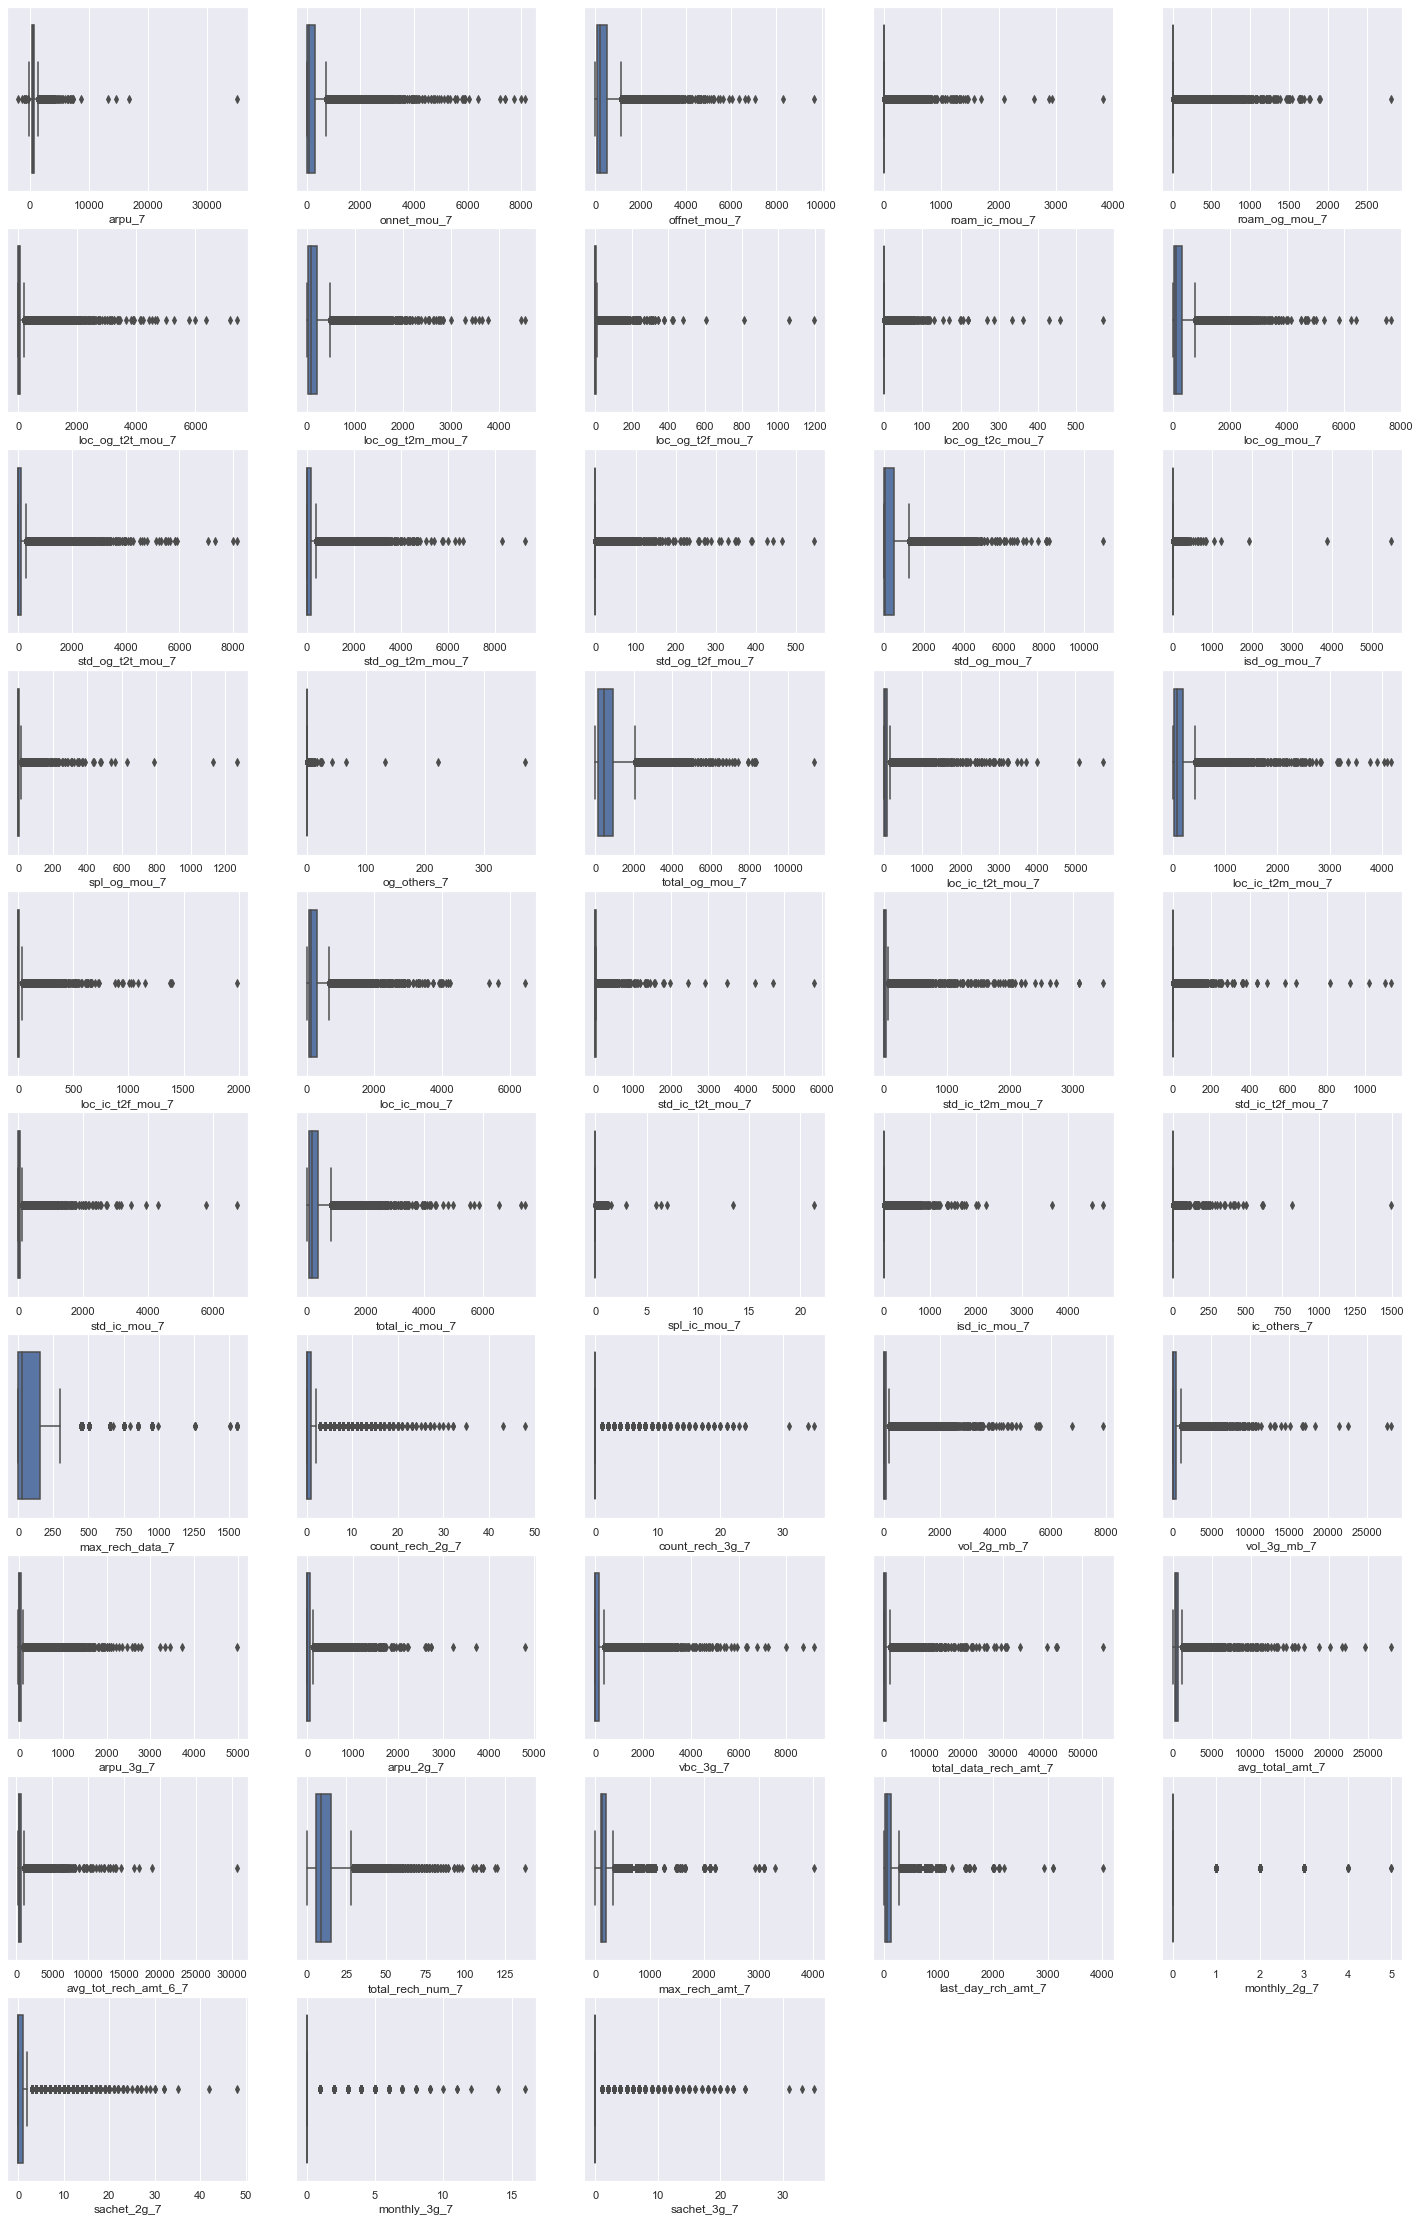

In [312]:
plt.figure(figsize=(25,40))
for i in enumerate(cols_with_7):
    plt.subplot(10,5,i[0]+1)
    sns.boxplot(x = i[1], data =telecom_hvc)
plt.show()

In [313]:
telecom_hvc[cols_with_7].describe()

,arpu_7,onnet_mou_7,offnet_mou_7,roam_ic_mou_7,roam_og_mou_7,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,og_others_7,total_og_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_mou_7,total_ic_mou_7,spl_ic_mou_7,isd_ic_mou_7,ic_others_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,vol_2g_mb_7,vol_3g_mb_7,arpu_3g_7,arpu_2g_7,vbc_3g_7,total_data_rech_amt_7,avg_total_amt_7,avg_tot_rech_amt_6_7,total_rech_num_7,max_rech_amt_7,last_day_rch_amt_7,monthly_2g_7,sachet_2g_7,monthly_3g_7,sachet_3g_7
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,560.782203,267.819295,378.103169,12.642504,20.152086,85.674287,163.009963,6.423683,1.889875,255.116292,174.233972,187.920768,1.826051,363.984508,2.105743,7.108646,0.042905,628.366047,66.636931,151.62521,16.035566,234.307412,15.421504,30.822517,2.798443,49.046114,296.756987,0.019765,11.875796,1.500338,79.841805,1.397287,0.456518,125.097326,370.196701,68.621327,64.701428,178.872765,528.233732,594.365874,576.310314,11.718843,172.201727,100.356021,0.183261,1.214026,0.229026,0.227492
std,479.776947,479.993989,498.923555,75.785903,96.100428,240.525999,241.576705,21.944183,9.158984,375.418979,421.190177,433.632143,12.980269,639.799336,45.545227,21.788304,2.676794,717.219171,167.403827,218.24326,49.165972,315.995071,83.042730,105.664499,19.514504,148.161116,373.747232,0.181859,80.179312,15.997307,114.273245,2.726290,1.283037,331.548010,915.525911,183.133851,165.284232,443.544138,1476.036563,816.087453,679.356991,9.432418,181.390742,140.925669,0.450423,2.736158,0.659125,1.089929
min,-2014.045000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-26.040000,-15.480000,0.000000,0.000000,0.000000,239.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,309.826000,16.030000,69.910000,0.000000,0.000000,4.610000,20.460000,0.000000,0.000000,34.480000,0.000000,0.000000,0.000000,0.150000,0.000000,0.000000,0.000000,116.490000,6.780000,30.78000,0.000000,52.510000,0.000000,0.000000,0.000000,1.050000,78.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,275.000000,301.500000,6.000000,110.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,480.943000,82.810000,220.030000,0.000000,0.000000,24.680000,78.880000,0.100000,0.000000,127.880000,2.680000,16.040000,0.000000,43.980000,0.000000,0.710000,0.000000,425.590000,25.780000,85.66000,2.000000,137.590000,0.450000,5.180000,0.000000,12.090000,187.580000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,100.000000,406.000000,400.000000,9.000000,128.000000,50.000000,0.000000,0.000000,0.000000,0.000000
75%,698.315000,290.240000,494.010000,0.000000,0.000000,78.340000,208.410000,4.380000,0.100000,333.390000,116.610000,160.280000,0.000000,499.290000,0.000000,6.940000,0.000000,891.440000,68.640000,190.66000,12.240000,298.710000,8.590000,24.940000,0.200000,43.810000,377.310000,0.000000,0.000000,0.000000,154.000000,1.00

#### Analysis for August Month

In [314]:
cols_with_8 = [i for i in num_cols if '_8' in i]
print(cols_with_8,len(cols_with_8))

['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'arpu_2g_8', 'vbc_3g_8', 'total_data_rech_amt_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8'] 47


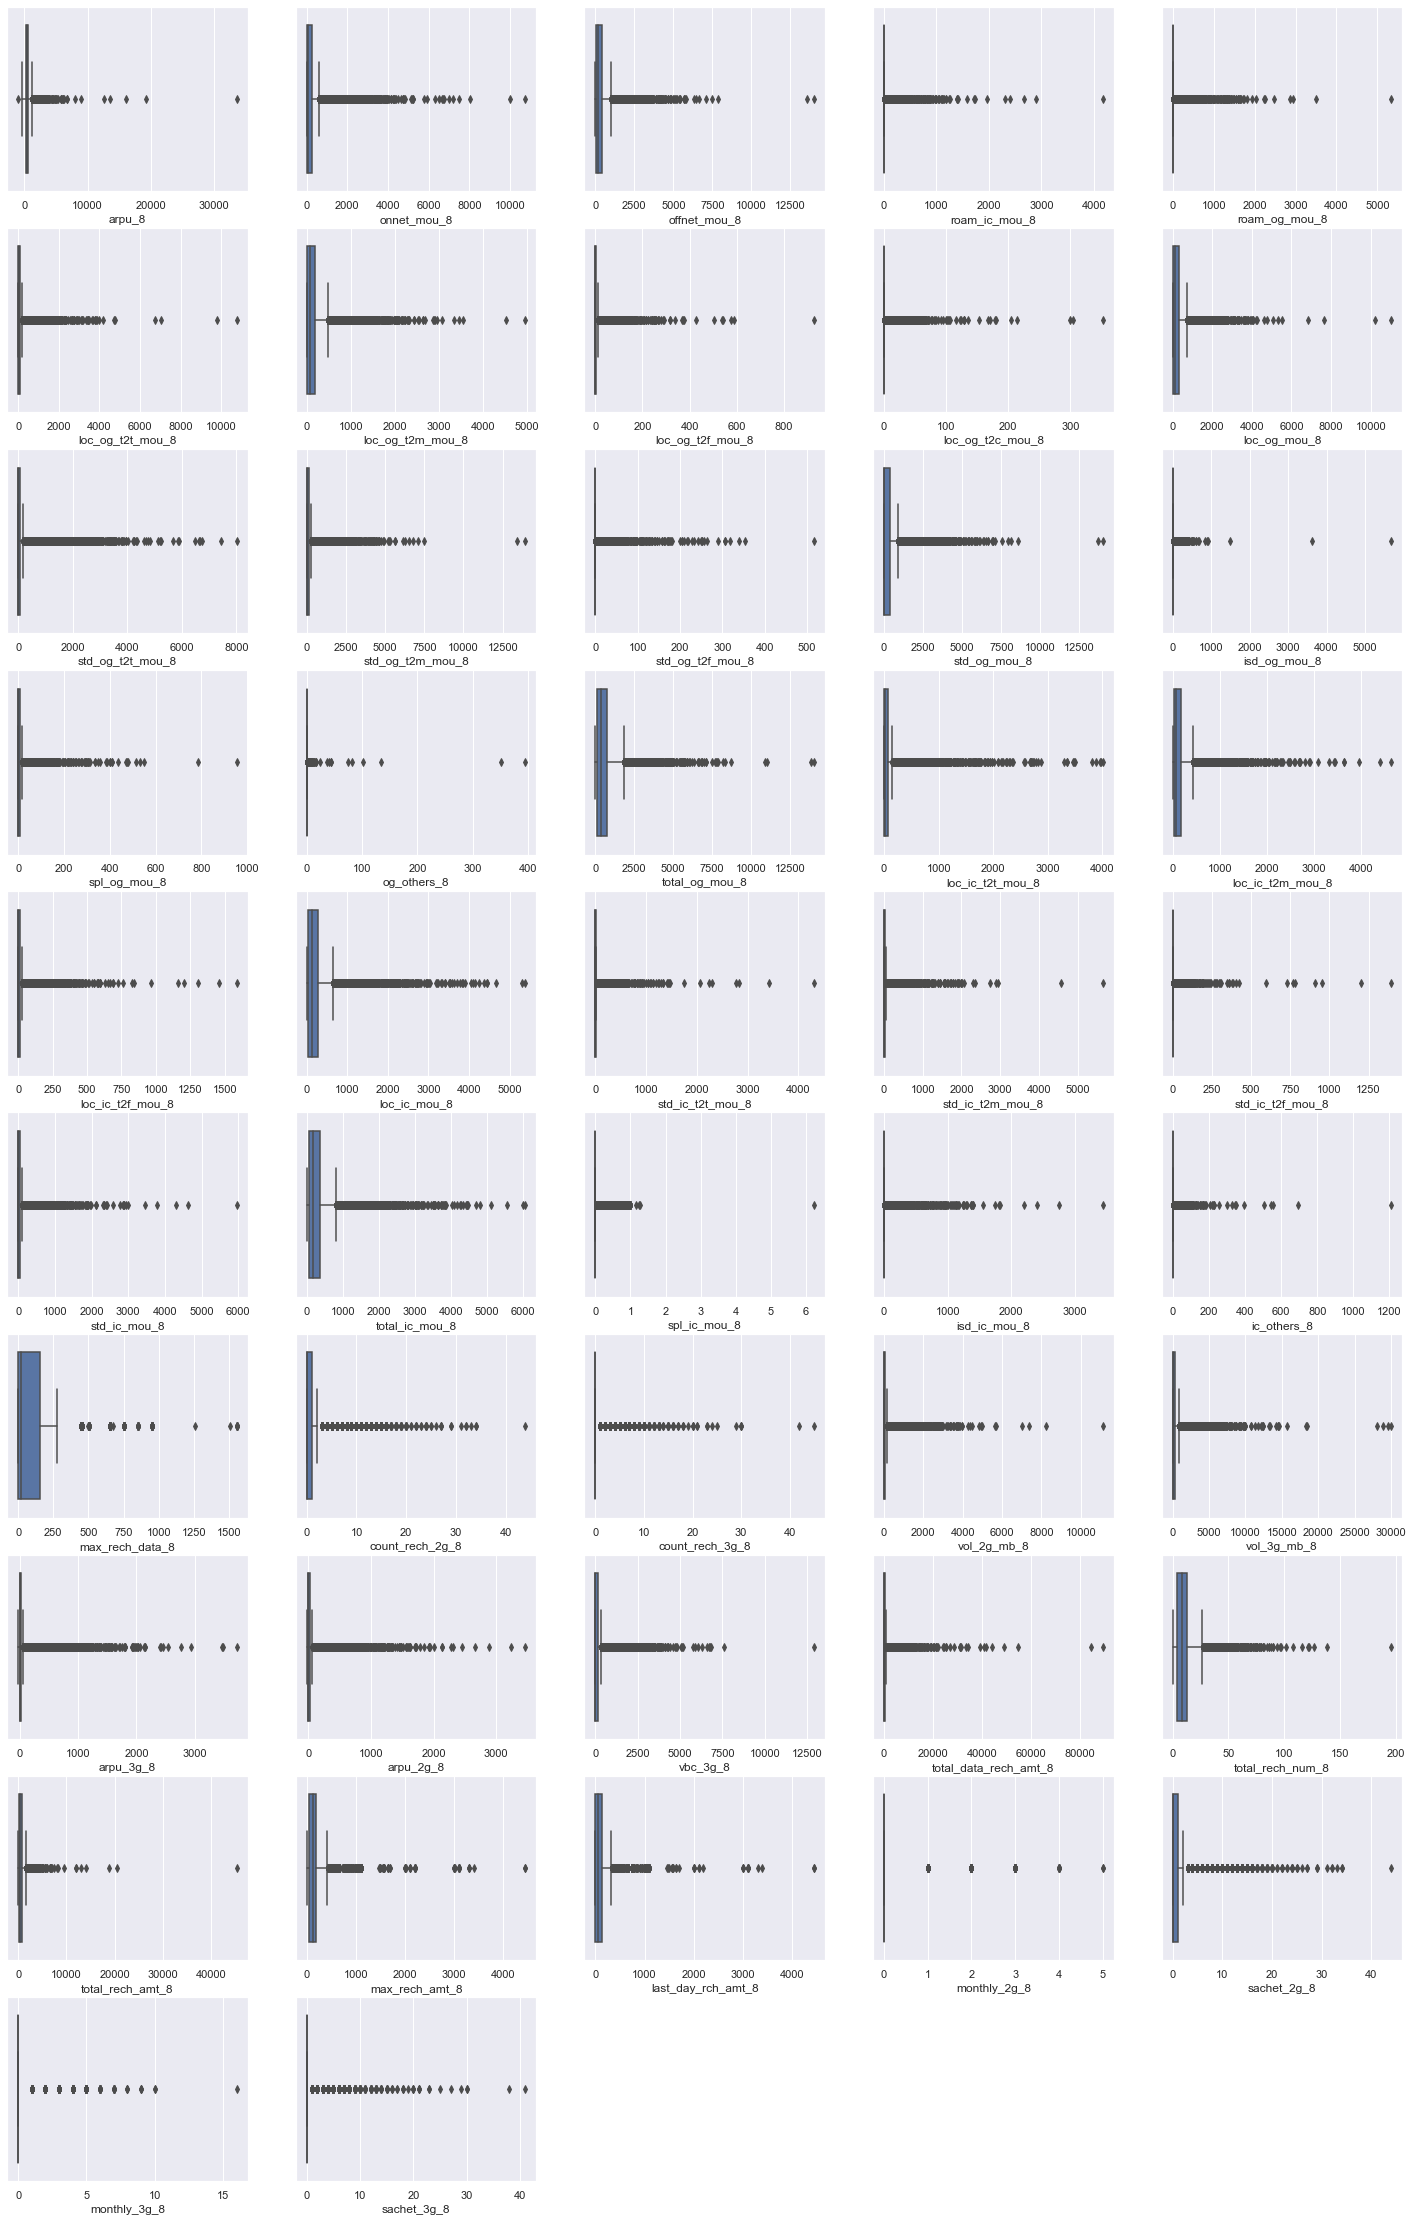

In [315]:
plt.figure(figsize=(25,40))
for i in enumerate(cols_with_8):
    plt.subplot(10,5,i[0]+1)
    sns.boxplot(x = i[1], data =telecom_hvc)
plt.show()

In [316]:
telecom_hvc[cols_with_8].describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,vbc_3g_8,total_data_rech_amt_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,508.597957,234.112539,335.077044,12.500551,19.865615,78.077112,151.756812,5.886385,1.707746,235.728174,148.441175,157.350068,1.584734,307.379315,1.948970,6.557204,0.057607,551.678812,62.619432,146.232731,14.403175,223.264679,13.913705,27.922597,2.561970,44.401653,279.922931,0.026567,10.998257,1.224455,72.492917,1.208493,0.413420,105.913072,351.493998,62.773480,58.395301,169.138860,463.252944,9.972868,584.365454,160.144462,92.393654,0.153628,1.054865,0.211026,0.202393
std,501.961981,458.448598,482.062509,74.125281,104.719009,227.373609,233.660905,19.502281,7.208138,363.370172,397.564547,409.100284,10.931804,608.976504,44.712024,20.311857,3.315125,700.478180,158.912293,214.882624,43.305191,308.315153,71.338522,103.341828,19.896938,138.813305,361.175175,0.110697,70.600636,12.783238,110.567519,2.537314,1.276497,313.384838,919.021056,170.173104,152.625125,420.974354,1622.766035,9.274370,611.245907,173.207799,145.182324,0.406486,2.535940,0.617549,1.100107
min,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-24.490000,-24.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,231.473000,10.390000,46.740000,0.000000,0.000000,2.530000,13.090000,0.000000,0.000000,22.460000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.360000,4.880000,24.210000,0.000000,40.530000,0.000000,0.000000,0.000000,0.410000,61.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,250.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,427.585000,65.610000,182.790000,0.000000,0.000000,20.730000,67.760000,0.000000,0.000000,110.810000,0.630000,9.460000,0.000000,25.480000,0.000000,0.430000,0.000000,333.540000,22.610000,80.040000,1.680000,128.730000,0.110000,3.710000,0.000000,9.290000,173.110000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,8.000000,490.000000,130.000000,50.000000,0.000000,0.000000,0.000000,0.000000
75%,661.491000,239.960000,438.890000,0.000000,0.000000,72.040000,196.960000,3.930000,0.010000,310.610000,78.190000,117.780000,0.000000,357.230000,0.000000,6.150000,0.000000,774.780000,65.080000,185.730000,11.160000,285.440000,7.040000,21.810000,0.080000,38.380000,361.730000,0.000000,0.000000,0.000000,154.000000,1.000000,0.000000,51.650000,356.190000,20.920000,26.900000,128.800000,304.000000,13.000000,776

We could see there are lots of columns with outliers, so we can cap them

#### Cap the outliers for the Numeric features at 0.01 and 0.99

As there are lot of columns for capping let us split based on the prefixes considering the time consumption

In [317]:
num_cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon'],
      dtype='object', length=143)

In [318]:
cap_col1 = ['aon','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_6','arpu_7','arpu_8',
            'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
            'ic_others_6','ic_others_7','ic_others_8']

In [319]:
for i, col in enumerate(cap_col1):
    q1 = telecom_hvc[col].quantile(0.01)
    q4 = telecom_hvc[col].quantile(0.99)
    telecom_hvc[col][telecom_hvc[col]<=q1] = q1
    telecom_hvc[col][telecom_hvc[col]>=q4] = q4

In [320]:
cap_col2 = ['isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','last_day_rch_amt_6',
            'last_day_rch_amt_7','last_day_rch_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','max_rech_data_6',
            'max_rech_data_7','max_rech_data_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7',
            'monthly_3g_8']

In [321]:
for i, col in enumerate(cap_col2):
    q1 = telecom_hvc[col].quantile(0.01)
    q4 = telecom_hvc[col].quantile(0.99)
    telecom_hvc[col][telecom_hvc[col]<=q1] = q1
    telecom_hvc[col][telecom_hvc[col]>=q4] = q4

In [322]:
cap_col3 = ['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8',
            'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8',
            'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8',
            'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8',
            'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8']

In [323]:
for i, col in enumerate(cap_col3):
    q1 = telecom_hvc[col].quantile(0.01)
    q4 = telecom_hvc[col].quantile(0.99)
    telecom_hvc[col][telecom_hvc[col]<=q1] = q1
    telecom_hvc[col][telecom_hvc[col]>=q4] = q4

In [324]:
cap_col4 = ['offnet_mou_6','offnet_mou_7','offnet_mou_8','og_others_6','og_others_7','og_others_8','onnet_mou_6','onnet_mou_7',
            'onnet_mou_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8',
            'sachet_2g_6','sachet_2g_7','sachet_2g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','spl_ic_mou_6','spl_ic_mou_7',
            'spl_ic_mou_8','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8']

In [325]:
for i, col in enumerate(cap_col4):
    q1 = telecom_hvc[col].quantile(0.01)
    q4 = telecom_hvc[col].quantile(0.99)
    telecom_hvc[col][telecom_hvc[col]<=q1] = q1
    telecom_hvc[col][telecom_hvc[col]>=q4] = q4

In [326]:
cap_col5 = ['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8',
            'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8',
            'std_og_mou_6','std_og_mou_7','std_og_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8',
            'std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8']

In [327]:
for i, col in enumerate(cap_col5):
    q1 = telecom_hvc[col].quantile(0.01)
    q4 = telecom_hvc[col].quantile(0.99)
    telecom_hvc[col][telecom_hvc[col]<=q1] = q1
    telecom_hvc[col][telecom_hvc[col]>=q4] = q4

In [328]:
cap_col6 = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8',
            'total_rech_amt_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','vbc_3g_6','vbc_3g_7','vbc_3g_8',
            'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']

In [329]:
for i, col in enumerate(cap_col6):
    q1 = telecom_hvc[col].quantile(0.01)
    q4 = telecom_hvc[col].quantile(0.99)
    telecom_hvc[col][telecom_hvc[col]<=q1] = q1
    telecom_hvc[col][telecom_hvc[col]>=q4] = q4

In [330]:
cap_col7 = ['avg_tot_rech_amt_6_7','avg_total_amt_6','avg_total_amt_7','total_data_rech_amt_6','total_data_rech_amt_7',
            'total_data_rech_amt_8']

In [331]:
for i, col in enumerate(cap_col7):
    q1 = telecom_hvc[col].quantile(0.01)
    q4 = telecom_hvc[col].quantile(0.99)
    telecom_hvc[col][telecom_hvc[col]<=q1] = q1
    telecom_hvc[col][telecom_hvc[col]>=q4] = q4

### Analyzing Correlation between columns

In [332]:
telecom_hvc[num_cols].corr().abs()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,avg_total_amt_6,avg_total_amt_7,avg_tot_rech_amt_6_7,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon
arpu_6,1.000000,0.595966,0.506669,0.426980,0.273604,0.237711,0.600623,0.394485,0.347943,0.154759,0.123657,0.132396,0.208736,0.158281,0.161176,0.260813,0.208502,0.195790,0.421733,0.320589,0.288708,0.200443,0.163189,0.153181,0.073495,0.004742,0.015119,0.431289,0.334388,0.299125,0.329024,0.194543,0.164587,0.370609,0.225923,0.189480,0.098947,0.077610,0.071265,0.472115,0.282290,0.232244,0.216611,0.135600,0.142203,0.147117,0.062607,0.060611,0.155047,NaN,NaN,0.665922,0.433313,0.364593,0.177585,0.137739,0.126979,0.263270,0.206408,0.175944,0.089532,0.073383,0.065005,0.260081,0.201872,0.174675,0.186849,0.126966,0.112019,0.185130,0.124294,0.114733,0.069932,0.052826,0.046506,0.210558,0.143182,0.128482,0.300707,0.224437,0.196336,0.055330,0.097113,0.018617,0.111836,0.072374,0.067781,0.073014,0.048793,0.046873,0.055125,0.051490,0.005533,0.215406,0.274238,0.212235,0.105859,0.000607,0.039083,0.095570,0.145958,0.115344,0.133609,0.043408,0.060161,0.235889,0.103991,0.135347,0.206439,0.079376,0.114578,0.047694,0.047927,0.110846,0.023809,0.095241,0.045856,0.457042,0.154785,0.341688,0.415430,0.155478,0.132178,0.491192,0.337304,0.224775,0.255371,0.268782,0.173486,0.191740,0.044651,0.100762,0.072346,0.207201,0.255164,0.200036,0.180304,0.072470,0.106939,0.031453,0.068474,0.051900,0.057704
arpu_7,0.595966,1.000000,0.696617,0.279468,0.420262,0.357605,0.409384,0.586163,0.486641,0.131299,0.148861,0.151127,0.159774,0.196145,0.191721,0.181193,0.261071,0.233757,0.287705,0.395757,0.338048,0.162692,0.200116,0.174701,0.015101,0.069146,0.045240,0.296557,0.416534,0.355095,0.210077,0.327663,0.278446,0.251252,0.385600,0.315510,0.078266,0.101874,0.087999,0.308704,0.480819,0.391860,0.140389,0.211041,0.164958,0.058170,0.145244,0.116945,0.063268,NaN,NaN,0.441343,0.660179,0.533955,0.113566,0.171249,0.157306,0.171453,0.250440,0.214465,0.059239,0.083099,0.073239,0.168078,0.246739,0.214710,0.137219,0.183342,0.164298,0.129153,0.187724,0.170890,0.05842

#### The below are the highest correlated variables

In [333]:
correlation_1 = telecom_hvc[num_cols].corr().abs()
correlation_1 = correlation_1.unstack().sort_values(kind='quicksort')
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1[correlation_1 != 1.0 ]
print(correlation_1.tail(50))

std_ic_t2m_mou_6       std_ic_mou_6             0.865351
std_ic_mou_6           std_ic_t2m_mou_6         0.865351
std_ic_t2m_mou_8       std_ic_mou_8             0.866216
std_ic_mou_8           std_ic_t2m_mou_8         0.866216
arpu_3g_8              monthly_3g_8             0.866405
monthly_3g_8           arpu_3g_8                0.866405
arpu_3g_6              monthly_3g_6             0.866646
monthly_3g_6           arpu_3g_6                0.866646
std_ic_mou_7           std_ic_t2m_mou_7         0.868563
std_ic_t2m_mou_7       std_ic_mou_7             0.868563
onnet_mou_7            std_og_t2t_mou_7         0.871645
std_og_t2t_mou_7       onnet_mou_7              0.871645
avg_total_amt_6        total_data_rech_amt_6    0.871812
total_data_rech_amt_6  avg_total_amt_6          0.871812
arpu_2g_7              monthly_3g_7             0.872024
monthly_3g_7           arpu_2g_7                0.872024
std_og_t2t_mou_8       onnet_mou_8              0.873319
onnet_mou_8            std_og_t

In [334]:
corr_cols = ['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_8','avg_total_amt_6','avg_total_amt_7',
                  'monthly_3g_6','monthly_3g_7','monthly_3g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8',
                  'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
                  'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8',
                  'og_others_7','og_others_8']

In [335]:
telecom_hvc.shape

(30001, 150)

In [336]:
telecom_hvc.drop(corr_cols, axis=1, inplace = True)

In [337]:
telecom_hvc.shape

(30001, 131)

In [338]:
corr_matrix = telecom_hvc.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print("List of highly correlated features from the above plot - \n\n", highly_correlated_features)
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))

List of highly correlated features from the above plot - 

 ['onnet_mou_8', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']


Total features with high correlation -  29


## Feature Engineering

After looking on the correlation data as number of features are repeating and before model building stage it is better to combine June and July data as Good phase and rename the August data as Active phase, so that the number of columns will be reduced and will have better understanding

In [339]:
telecom_hvc.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_8,avg_tot_rech_amt_6_7,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,0,0,0,1,1,1,968,30.40,0.00,101.20,252.0,279.5,1
1,1069.180,1349.850,1986.622,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,487.53,609.24,350.16,58.14,32.26,27.31,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,51.38,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1000,790,951,0,0,565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,592.5,1
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,508.36,431.66,171.56,23.84,9.84,0.31,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.00,356.00,0.03,0.00,750.95,11.94,0.00,0.00,19.83,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,1,1,315,21.03,910.65,122.16,207.0,348.0,0
3,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74

In [340]:
# Custom Function to derive new good phase columns and drop the original columns 
def derive_good_action_phase(df, col):
    
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    good_phase_col = col + "_good"
    action_phase_col = col + "_action"
    
    df[good_phase_col] = (df[col_6] + df[col_7])/2
    df[action_phase_col] = df[col_8]
    
    df.drop([col_6, col_7, col_8], axis = 1, inplace = True)
    
    return df

In [341]:
# Derive Good and Action Phase Variables

In [342]:
telecom_hvc = derive_good_action_phase(telecom_hvc, "arpu")
telecom_hvc = derive_good_action_phase(telecom_hvc, "arpu_2g")
telecom_hvc = derive_good_action_phase(telecom_hvc, "arpu_3g")
telecom_hvc = derive_good_action_phase(telecom_hvc, "count_rech_2g")
telecom_hvc = derive_good_action_phase(telecom_hvc, "count_rech_3g")
telecom_hvc = derive_good_action_phase(telecom_hvc, "ic_others")
telecom_hvc = derive_good_action_phase(telecom_hvc, "isd_ic_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "isd_og_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "last_day_rch_amt")
telecom_hvc = derive_good_action_phase(telecom_hvc, "loc_ic_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "loc_ic_t2f_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "loc_ic_t2t_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "loc_og_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "loc_og_t2c_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "loc_og_t2f_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "loc_og_t2m_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "loc_og_t2t_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "max_rech_amt")
telecom_hvc = derive_good_action_phase(telecom_hvc, "max_rech_data")
telecom_hvc = derive_good_action_phase(telecom_hvc, "monthly_2g")
telecom_hvc = derive_good_action_phase(telecom_hvc, "offnet_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "onnet_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "roam_ic_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "roam_og_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "sachet_3g")
telecom_hvc = derive_good_action_phase(telecom_hvc, "spl_ic_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "spl_og_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "std_ic_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "std_ic_t2f_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "std_ic_t2t_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "std_og_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "std_og_t2f_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "std_og_t2m_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "std_og_t2t_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "total_ic_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "total_og_mou")
telecom_hvc = derive_good_action_phase(telecom_hvc, "total_rech_num")
telecom_hvc = derive_good_action_phase(telecom_hvc, "vbc_3g")
telecom_hvc = derive_good_action_phase(telecom_hvc, "vol_2g_mb")
telecom_hvc = derive_good_action_phase(telecom_hvc, "vol_3g_mb")


In [343]:
telecom_hvc.head()

,og_others_6,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,total_data_rech_amt_8,avg_tot_rech_amt_6_7,churn,arpu_good,arpu_action,arpu_2g_good,arpu_2g_action,arpu_3g_good,arpu_3g_action,count_rech_2g_good,count_rech_2g_action,count_rech_3g_good,count_rech_3g_action,ic_others_good,ic_others_action,isd_ic_mou_good,isd_ic_mou_action,isd_og_mou_good,isd_og_mou_action,last_day_rch_amt_good,last_day_rch_amt_action,loc_ic_mou_good,loc_ic_mou_action,loc_ic_t2f_mou_good,loc_ic_t2f_mou_action,loc_ic_t2t_mou_good,loc_ic_t2t_mou_action,loc_og_mou_good,loc_og_mou_action,loc_og_t2c_mou_good,loc_og_t2c_mou_action,loc_og_t2f_mou_good,loc_og_t2f_mou_action,loc_og_t2m_mou_good,loc_og_t2m_mou_action,loc_og_t2t_mou_good,loc_og_t2t_mou_action,max_rech_amt_good,max_rech_amt_action,max_rech_data_good,max_rech_data_action,monthly_2g_good,monthly_2g_action,offnet_mou_good,offnet_mou_action,onnet_mou_good,onnet_mou_action,roam_ic_mou_good,roam_ic_mou_action,roam_og_mou_good,roam_og_mou_action,sachet_3g_good,sachet_3g_action,spl_ic_mou_good,spl_ic_mou_action,spl_og_mou_good,spl_og_mou_action,std_ic_mou_good,std_ic_mou_action,std_ic_t2f_mou_good,std_ic_t2f_mou_action,std_ic_t2t_mou_good,std_ic_t2t_mou_action,std_og_mou_good,std_og_mou_action,std_og_t2f_mou_good,std_og_t2f_mou_action,std_og_t2m_mou_good,std_og_t2m_mou_action,std_og_t2t_mou_good,std_og_t2t_mou_action,total_ic_mou_good,total_ic_mou_action,total_og_mou_good,total_og_mou_action,total_rech_num_good,total_rech_num_action,vbc_3g_good,vbc_3g_action,vol_2g_mb_good,vol_2g_mb_action,vol_3g_mb_good,vol_3g_mb_action
0,0.0,0,0,0,1,1,1,968,252.0,279.5,1,206.1005,213.803,212.17,212.17,212.170,212.17,0.0,0.0,1.0,1.0,0.000,0.00,0.000,0.00,0.000,0.00,252.0,252,0.000,5.44,0.000,1.15,0.000,0.16,0.000,0.00,0.0,0.00,0.000,0.00,0.000,0.00,0.000,0.00,252.0,252,252.0,252.0,0.0,0,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.0,0,0.000,0.0,0.00,0.00,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,5.44,0.000,0.00,3.5,2,50.600,30.40,15.725,5.75,117.165,109.61
1,0.0,0,0,0,0,0,0,802,0.0,592.5,1,1209.5150,1986.622,0.00,0.00,0.000,0.00,0.0,0.0,0.0,0.0,15.465,15.14,8.295,31.59,0.090,10.01,0.0,565,391.555,188.04,126.810,39.53,45.200,27.31,478.035,255.79,0.0,0.00,58.635,53.23,378.005,162.28,41.385,40.28,895.0,951,0.0,0.0,0.0,0,510.295,325.91,56.26,52.29,24.86,31.64,18.165,38.06,0.0,0,0.105,0.0,2.25,6.50,176.810,193.94,42.81,22.21,24.360,30.39,68.000,77.84,13.37,16.68,40.825,49.14,13.795,12.01,592.250,428.74,548.385,350.16,5.0,7,19.060,57.74,0.000,0.00,0.000,0.00
2,0.0,0,0,0,0,1,1,315,207.0,348.0,0,435.4720,137.362,0.00,0.00,0.000,19.83,1.0,3.0,0.0,0.0,0.000,0.00,0.000,0.00,0.000,0.00,25.0,10,52.630,15.79,0.000,0.00,16.840,0.31,333.135,63.04,0.0,7.15,0.000,0.00,75.770,50.54,257.360,12.49,122.0,30,77.0,23.0,0.5,0,87.645,136.48,382.36,35.08,0.00,0.00,0.000,0.00,0.0,0,0.000,0.0,0.00,10.23,13.545,0.75,0.00,0.00,0.290,0.10,136.870,98.28,0.00,0.00,11.865,75.69,124.995,22.58,66.175,16.54,470.010,171.56,20.0,14,516.405,21.03,178.000,0.03,375.475,11.94
3,0.0,0,0,0,0,0,0,720,0.0,320.0,0,556.1030,637.760,0.00,0.00,0.000,0.00,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.00,0.000,0.00,25.0,50,106.505,159.11,3.725,10.39,6.335,19.54,95.565,129.74,0.0,0.00,0.375,1.58,89.870,104.81,5.320,23.34,50.0,50,0.0,0.0,0.0,0,827.305,983.39,117.26,85.14,0.00,0.00,0.000,0.00,0.0,0,0.000,0.0,0.00,0.00,62.985,101.93,0.00,0.00,10.020,0.18,848.990,938.79,0.00,0.00,737.050,876.99,111.935,61.79,169.490,261.04,944.565,1068.54,24.0,27,0.000,0.00,0.000,0.00,0.000,0.00
4,0.0,0,0,0,0,1,1,604,540.0,291.5,0,134.1235,366.966,150.89,150.67,153.285,197.27,0.0,0.0,1.0,2.0,2.675,13.06,14.115,3.74,0.005,0.00,89.5,0,145.520,224.21,0.000,0.71,40.875,76.64,132.795,182.14,0.0,17.71,0.000,0.00,82.975,148.56,49.810,33.58,89.5,179,89.5,179.0,0.0,0,87.385,205.89,49.81,33.58,0.00,0.00,0.000,0.00,0.0,1,0.000,0.0,0.05,17.71,8.915,57.29,0.00,0.00,0.255,13.38,4.355,39.61,0.00,0.00,4.355,39.61,0.000,0.00,171.235,298.33,137.210,

In [344]:
telecom_hvc.rename(columns = {'og_others_6':'og_others_good',
                               'avg_tot_rech_amt_6_7':'avg_tot_rech_amt_good',
                               'total_data_rech_amt_8':'total_data_rech_amt_action'}, inplace=True)

In [345]:
telecom_hvc.head()

,og_others_good,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,total_data_rech_amt_action,avg_tot_rech_amt_good,churn,arpu_good,arpu_action,arpu_2g_good,arpu_2g_action,arpu_3g_good,arpu_3g_action,count_rech_2g_good,count_rech_2g_action,count_rech_3g_good,count_rech_3g_action,ic_others_good,ic_others_action,isd_ic_mou_good,isd_ic_mou_action,isd_og_mou_good,isd_og_mou_action,last_day_rch_amt_good,last_day_rch_amt_action,loc_ic_mou_good,loc_ic_mou_action,loc_ic_t2f_mou_good,loc_ic_t2f_mou_action,loc_ic_t2t_mou_good,loc_ic_t2t_mou_action,loc_og_mou_good,loc_og_mou_action,loc_og_t2c_mou_good,loc_og_t2c_mou_action,loc_og_t2f_mou_good,loc_og_t2f_mou_action,loc_og_t2m_mou_good,loc_og_t2m_mou_action,loc_og_t2t_mou_good,loc_og_t2t_mou_action,max_rech_amt_good,max_rech_amt_action,max_rech_data_good,max_rech_data_action,monthly_2g_good,monthly_2g_action,offnet_mou_good,offnet_mou_action,onnet_mou_good,onnet_mou_action,roam_ic_mou_good,roam_ic_mou_action,roam_og_mou_good,roam_og_mou_action,sachet_3g_good,sachet_3g_action,spl_ic_mou_good,spl_ic_mou_action,spl_og_mou_good,spl_og_mou_action,std_ic_mou_good,std_ic_mou_action,std_ic_t2f_mou_good,std_ic_t2f_mou_action,std_ic_t2t_mou_good,std_ic_t2t_mou_action,std_og_mou_good,std_og_mou_action,std_og_t2f_mou_good,std_og_t2f_mou_action,std_og_t2m_mou_good,std_og_t2m_mou_action,std_og_t2t_mou_good,std_og_t2t_mou_action,total_ic_mou_good,total_ic_mou_action,total_og_mou_good,total_og_mou_action,total_rech_num_good,total_rech_num_action,vbc_3g_good,vbc_3g_action,vol_2g_mb_good,vol_2g_mb_action,vol_3g_mb_good,vol_3g_mb_action
0,0.0,0,0,0,1,1,1,968,252.0,279.5,1,206.1005,213.803,212.17,212.17,212.170,212.17,0.0,0.0,1.0,1.0,0.000,0.00,0.000,0.00,0.000,0.00,252.0,252,0.000,5.44,0.000,1.15,0.000,0.16,0.000,0.00,0.0,0.00,0.000,0.00,0.000,0.00,0.000,0.00,252.0,252,252.0,252.0,0.0,0,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.0,0,0.000,0.0,0.00,0.00,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,5.44,0.000,0.00,3.5,2,50.600,30.40,15.725,5.75,117.165,109.61
1,0.0,0,0,0,0,0,0,802,0.0,592.5,1,1209.5150,1986.622,0.00,0.00,0.000,0.00,0.0,0.0,0.0,0.0,15.465,15.14,8.295,31.59,0.090,10.01,0.0,565,391.555,188.04,126.810,39.53,45.200,27.31,478.035,255.79,0.0,0.00,58.635,53.23,378.005,162.28,41.385,40.28,895.0,951,0.0,0.0,0.0,0,510.295,325.91,56.26,52.29,24.86,31.64,18.165,38.06,0.0,0,0.105,0.0,2.25,6.50,176.810,193.94,42.81,22.21,24.360,30.39,68.000,77.84,13.37,16.68,40.825,49.14,13.795,12.01,592.250,428.74,548.385,350.16,5.0,7,19.060,57.74,0.000,0.00,0.000,0.00
2,0.0,0,0,0,0,1,1,315,207.0,348.0,0,435.4720,137.362,0.00,0.00,0.000,19.83,1.0,3.0,0.0,0.0,0.000,0.00,0.000,0.00,0.000,0.00,25.0,10,52.630,15.79,0.000,0.00,16.840,0.31,333.135,63.04,0.0,7.15,0.000,0.00,75.770,50.54,257.360,12.49,122.0,30,77.0,23.0,0.5,0,87.645,136.48,382.36,35.08,0.00,0.00,0.000,0.00,0.0,0,0.000,0.0,0.00,10.23,13.545,0.75,0.00,0.00,0.290,0.10,136.870,98.28,0.00,0.00,11.865,75.69,124.995,22.58,66.175,16.54,470.010,171.56,20.0,14,516.405,21.03,178.000,0.03,375.475,11.94
3,0.0,0,0,0,0,0,0,720,0.0,320.0,0,556.1030,637.760,0.00,0.00,0.000,0.00,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.00,0.000,0.00,25.0,50,106.505,159.11,3.725,10.39,6.335,19.54,95.565,129.74,0.0,0.00,0.375,1.58,89.870,104.81,5.320,23.34,50.0,50,0.0,0.0,0.0,0,827.305,983.39,117.26,85.14,0.00,0.00,0.000,0.00,0.0,0,0.000,0.0,0.00,0.00,62.985,101.93,0.00,0.00,10.020,0.18,848.990,938.79,0.00,0.00,737.050,876.99,111.935,61.79,169.490,261.04,944.565,1068.54,24.0,27,0.000,0.00,0.000,0.00,0.000,0.00
4,0.0,0,0,0,0,1,1,604,540.0,291.5,0,134.1235,366.966,150.89,150.67,153.285,197.27,0.0,0.0,1.0,2.0,2.675,13.06,14.115,3.74,0.005,0.00,89.5,0,145.520,224.21,0.000,0.71,40.875,76.64,132.795,182.14,0.0,17.71,0.000,0.00,82.975,148.56,49.810,33.58,89.5,179,89.5,179.0,0.0,0,87.385,205.89,49.81,33.58,0.00,0.00,0.000,0.00,0.0,1,0.000,0.0,0.05,17.71,8.915,57.29,0.00,0.00,0.255,13.38,4.355,39.61,0.00,0.00,4.355,39.61,0.000,0.00,171.235,298.33

In [346]:
telecom_hvc.shape

(30001, 91)

## Model Building 

### Splitting into X & y and Scaling the features

In [347]:
# Putting feature variable to X
X = telecom_hvc.drop(['churn'],axis=1)

# Putting response variable to y
y = telecom_hvc['churn']

In [348]:
X.head()

,og_others_good,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,total_data_rech_amt_action,avg_tot_rech_amt_good,arpu_good,arpu_action,arpu_2g_good,arpu_2g_action,arpu_3g_good,arpu_3g_action,count_rech_2g_good,count_rech_2g_action,count_rech_3g_good,count_rech_3g_action,ic_others_good,ic_others_action,isd_ic_mou_good,isd_ic_mou_action,isd_og_mou_good,isd_og_mou_action,last_day_rch_amt_good,last_day_rch_amt_action,loc_ic_mou_good,loc_ic_mou_action,loc_ic_t2f_mou_good,loc_ic_t2f_mou_action,loc_ic_t2t_mou_good,loc_ic_t2t_mou_action,loc_og_mou_good,loc_og_mou_action,loc_og_t2c_mou_good,loc_og_t2c_mou_action,loc_og_t2f_mou_good,loc_og_t2f_mou_action,loc_og_t2m_mou_good,loc_og_t2m_mou_action,loc_og_t2t_mou_good,loc_og_t2t_mou_action,max_rech_amt_good,max_rech_amt_action,max_rech_data_good,max_rech_data_action,monthly_2g_good,monthly_2g_action,offnet_mou_good,offnet_mou_action,onnet_mou_good,onnet_mou_action,roam_ic_mou_good,roam_ic_mou_action,roam_og_mou_good,roam_og_mou_action,sachet_3g_good,sachet_3g_action,spl_ic_mou_good,spl_ic_mou_action,spl_og_mou_good,spl_og_mou_action,std_ic_mou_good,std_ic_mou_action,std_ic_t2f_mou_good,std_ic_t2f_mou_action,std_ic_t2t_mou_good,std_ic_t2t_mou_action,std_og_mou_good,std_og_mou_action,std_og_t2f_mou_good,std_og_t2f_mou_action,std_og_t2m_mou_good,std_og_t2m_mou_action,std_og_t2t_mou_good,std_og_t2t_mou_action,total_ic_mou_good,total_ic_mou_action,total_og_mou_good,total_og_mou_action,total_rech_num_good,total_rech_num_action,vbc_3g_good,vbc_3g_action,vol_2g_mb_good,vol_2g_mb_action,vol_3g_mb_good,vol_3g_mb_action
0,0.0,0,0,0,1,1,1,968,252.0,279.5,206.1005,213.803,212.17,212.17,212.170,212.17,0.0,0.0,1.0,1.0,0.000,0.00,0.000,0.00,0.000,0.00,252.0,252,0.000,5.44,0.000,1.15,0.000,0.16,0.000,0.00,0.0,0.00,0.000,0.00,0.000,0.00,0.000,0.00,252.0,252,252.0,252.0,0.0,0,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.0,0,0.000,0.0,0.00,0.00,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,5.44,0.000,0.00,3.5,2,50.600,30.40,15.725,5.75,117.165,109.61
1,0.0,0,0,0,0,0,0,802,0.0,592.5,1209.5150,1986.622,0.00,0.00,0.000,0.00,0.0,0.0,0.0,0.0,15.465,15.14,8.295,31.59,0.090,10.01,0.0,565,391.555,188.04,126.810,39.53,45.200,27.31,478.035,255.79,0.0,0.00,58.635,53.23,378.005,162.28,41.385,40.28,895.0,951,0.0,0.0,0.0,0,510.295,325.91,56.26,52.29,24.86,31.64,18.165,38.06,0.0,0,0.105,0.0,2.25,6.50,176.810,193.94,42.81,22.21,24.360,30.39,68.000,77.84,13.37,16.68,40.825,49.14,13.795,12.01,592.250,428.74,548.385,350.16,5.0,7,19.060,57.74,0.000,0.00,0.000,0.00
2,0.0,0,0,0,0,1,1,315,207.0,348.0,435.4720,137.362,0.00,0.00,0.000,19.83,1.0,3.0,0.0,0.0,0.000,0.00,0.000,0.00,0.000,0.00,25.0,10,52.630,15.79,0.000,0.00,16.840,0.31,333.135,63.04,0.0,7.15,0.000,0.00,75.770,50.54,257.360,12.49,122.0,30,77.0,23.0,0.5,0,87.645,136.48,382.36,35.08,0.00,0.00,0.000,0.00,0.0,0,0.000,0.0,0.00,10.23,13.545,0.75,0.00,0.00,0.290,0.10,136.870,98.28,0.00,0.00,11.865,75.69,124.995,22.58,66.175,16.54,470.010,171.56,20.0,14,516.405,21.03,178.000,0.03,375.475,11.94
3,0.0,0,0,0,0,0,0,720,0.0,320.0,556.1030,637.760,0.00,0.00,0.000,0.00,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.00,0.000,0.00,25.0,50,106.505,159.11,3.725,10.39,6.335,19.54,95.565,129.74,0.0,0.00,0.375,1.58,89.870,104.81,5.320,23.34,50.0,50,0.0,0.0,0.0,0,827.305,983.39,117.26,85.14,0.00,0.00,0.000,0.00,0.0,0,0.000,0.0,0.00,0.00,62.985,101.93,0.00,0.00,10.020,0.18,848.990,938.79,0.00,0.00,737.050,876.99,111.935,61.79,169.490,261.04,944.565,1068.54,24.0,27,0.000,0.00,0.000,0.00,0.000,0.00
4,0.0,0,0,0,0,1,1,604,540.0,291.5,134.1235,366.966,150.89,150.67,153.285,197.27,0.0,0.0,1.0,2.0,2.675,13.06,14.115,3.74,0.005,0.00,89.5,0,145.520,224.21,0.000,0.71,40.875,76.64,132.795,182.14,0.0,17.71,0.000,0.00,82.975,148.56,49.810,33.58,89.5,179,89.5,179.0,0.0,0,87.385,205.89,49.81,33.58,0.00,0.00,0.000,0.00,0.0,1,0.000,0.0,0.05,17.71,8.915,57.29,0.00,0.00,0.255,13.38,4.355,39.61,0.00,0.00,4.355,39.61,0.000,0.00,171.235,298.33,137.210,239.48,

In [349]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int32

In [350]:
# Scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['og_others_good', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon',
       'total_data_rech_amt_action', 'avg_tot_rech_amt_good', 'arpu_good',
       'arpu_action', 'arpu_2g_good', 'arpu_2g_action', 'arpu_3g_good',
       'arpu_3g_action', 'count_rech_2g_good', 'count_rech_2g_action',
       'count_rech_3g_good', 'count_rech_3g_action', 'ic_others_good',
       'ic_others_action', 'isd_ic_mou_good', 'isd_ic_mou_action',
       'isd_og_mou_good', 'isd_og_mou_action', 'last_day_rch_amt_good',
       'last_day_rch_amt_action', 'loc_ic_mou_good', 'loc_ic_mou_action',
       'loc_ic_t2f_mou_good', 'loc_ic_t2f_mou_action', 'loc_ic_t2t_mou_good',
       'loc_ic_t2t_mou_action', 'loc_og_mou_good', 'loc_og_mou_action',
       'loc_og_t2c_mou_good', 'loc_og_t2c_mou_action', 'loc_og_t2f_mou_good',
       'loc_og_t2f_mou_action', 'loc_og_t2m_mou_good', 'loc_og_t2m_mou_action',
       'loc_og_t2t_mou_good', 'loc_og_t2t_mou_action

### Train-Test Split

In [351]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Interpretable Model Using Logistic Regression

#### Running the model on the Train dataset

In [352]:
import statsmodels.api as sm

#### Feature Selection Using RFE

In [353]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')

In [354]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 20 variables as output 
rfe = rfe.fit(X_train, y_train)

In [355]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('og_others_good', False, 40),
 ('night_pck_user_6', False, 68),
 ('night_pck_user_7', False, 58),
 ('night_pck_user_8', False, 57),
 ('fb_user_6', False, 69),
 ('fb_user_7', False, 65),
 ('fb_user_8', False, 16),
 ('aon', False, 3),
 ('total_data_rech_amt_action', False, 19),
 ('avg_tot_rech_amt_good', False, 27),
 ('arpu_good', True, 1),
 ('arpu_action', False, 23),
 ('arpu_2g_good', False, 12),
 ('arpu_2g_action', False, 29),
 ('arpu_3g_good', False, 64),
 ('arpu_3g_action', False, 49),
 ('count_rech_2g_good', False, 25),
 ('count_rech_2g_action', True, 1),
 ('count_rech_3g_good', False, 45),
 ('count_rech_3g_action', False, 30),
 ('ic_others_good', False, 63),
 ('ic_others_action', False, 74),
 ('isd_ic_mou_good', False, 20),
 ('isd_ic_mou_action', False, 67),
 ('isd_og_mou_good', False, 76),
 ('isd_og_mou_action', False, 71),
 ('last_day_rch_amt_good', False, 50),
 ('last_day_rch_amt_action', True, 1),
 ('loc_ic_mou_good', True, 1),
 ('loc_ic_mou_action', True, 1),
 ('loc_ic_t2f_

In [356]:
rfe_col = X_train.columns[rfe.support_]

In [357]:
rfe_col

Index(['arpu_good', 'count_rech_2g_action', 'last_day_rch_amt_action',
       'loc_ic_mou_good', 'loc_ic_mou_action', 'loc_og_t2m_mou_good',
       'max_rech_data_action', 'offnet_mou_good', 'spl_ic_mou_action',
       'std_og_mou_action', 'std_og_t2m_mou_action', 'std_og_t2t_mou_action',
       'total_og_mou_action', 'total_rech_num_action', 'vol_2g_mb_action'],
      dtype='object')

In [358]:
X_train.columns[~rfe.support_]

Index(['og_others_good', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon',
       'total_data_rech_amt_action', 'avg_tot_rech_amt_good', 'arpu_action',
       'arpu_2g_good', 'arpu_2g_action', 'arpu_3g_good', 'arpu_3g_action',
       'count_rech_2g_good', 'count_rech_3g_good', 'count_rech_3g_action',
       'ic_others_good', 'ic_others_action', 'isd_ic_mou_good',
       'isd_ic_mou_action', 'isd_og_mou_good', 'isd_og_mou_action',
       'last_day_rch_amt_good', 'loc_ic_t2f_mou_good', 'loc_ic_t2f_mou_action',
       'loc_ic_t2t_mou_good', 'loc_ic_t2t_mou_action', 'loc_og_mou_good',
       'loc_og_mou_action', 'loc_og_t2c_mou_good', 'loc_og_t2c_mou_action',
       'loc_og_t2f_mou_good', 'loc_og_t2f_mou_action', 'loc_og_t2m_mou_action',
       'loc_og_t2t_mou_good', 'loc_og_t2t_mou_action', 'max_rech_amt_good',
       'max_rech_amt_action', 'max_rech_data_good', 'monthly_2g_good',
       'monthly_2g_action', 'offnet_mou_action

#### Assessing the model with StatsModels

##### Iteration 1

In [359]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [360]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
print ('Stats Model Summary ', '\n', res.summary(),'\n')

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print ('VIF','\n', vif)

Stats Model Summary  
                  Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3869.3
Date:                Sun, 30 May 2021   Deviance:                       7738.5
Time:                        16:31:03   Pearson chi2:                 3.34e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
con

p-value for the features are under control, VIFs are more which clearly tells us that there are multi-colinearity issues. So let us drop the column having high VIF

##### Iteration 2

In [361]:
rfe_col = rfe_col.drop('std_og_mou_action', 1)
rfe_col

Index(['arpu_good', 'count_rech_2g_action', 'last_day_rch_amt_action',
       'loc_ic_mou_good', 'loc_ic_mou_action', 'loc_og_t2m_mou_good',
       'max_rech_data_action', 'offnet_mou_good', 'spl_ic_mou_action',
       'std_og_t2m_mou_action', 'std_og_t2t_mou_action', 'total_og_mou_action',
       'total_rech_num_action', 'vol_2g_mb_action'],
      dtype='object')

In [362]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[rfe_col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
print ('Stats Model Summary ', '\n', res.summary(),'\n')

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print ('VIF','\n', vif)

Stats Model Summary  
                  Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3881.7
Date:                Sun, 30 May 2021   Deviance:                       7763.5
Time:                        16:31:03   Pearson chi2:                 4.56e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
con

p-value for the features are under control, VIFs are more which clearly tells us that there are multi-colinearity issues. So let us drop the column having high VIF

##### Iteration 3

In [363]:
rfe_col = rfe_col.drop('total_og_mou_action', 1)
rfe_col

Index(['arpu_good', 'count_rech_2g_action', 'last_day_rch_amt_action',
       'loc_ic_mou_good', 'loc_ic_mou_action', 'loc_og_t2m_mou_good',
       'max_rech_data_action', 'offnet_mou_good', 'spl_ic_mou_action',
       'std_og_t2m_mou_action', 'std_og_t2t_mou_action',
       'total_rech_num_action', 'vol_2g_mb_action'],
      dtype='object')

In [364]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[rfe_col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
print ('Stats Model Summary ', '\n', res.summary(),'\n')

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print ('VIF','\n', vif)

Stats Model Summary  
                  Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3898.4
Date:                Sun, 30 May 2021   Deviance:                       7796.8
Time:                        16:31:04   Pearson chi2:                 1.02e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
con

The p-value and VIFs are under control. This is our final model after 3 Iterations

#### Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

In [365]:
predict1 = res.params[1:]
predict1 = 100.0 * (predict1 / predict1.max())
predict1.sort_values(ascending=False)

loc_ic_mou_good            100.000000
arpu_good                   73.498317
offnet_mou_good             28.064700
std_og_t2t_mou_action      -39.996100
vol_2g_mb_action           -55.486558
loc_og_t2m_mou_good        -63.890227
std_og_t2m_mou_action      -65.931863
count_rech_2g_action       -75.421057
spl_ic_mou_action          -87.824247
total_rech_num_action      -91.936586
max_rech_data_action       -92.492618
last_day_rch_amt_action    -94.852932
loc_ic_mou_action         -421.915157
dtype: float64

In [366]:
# Sort the feature variables based on their relative coefficient values

sorted_idx = np.argsort(predict1,kind='quicksort',order='list of str')
sorted_idx.sort_values(ascending=False)

spl_ic_mou_action          12
loc_ic_mou_good            11
std_og_t2m_mou_action      10
max_rech_data_action        9
loc_ic_mou_action           8
std_og_t2t_mou_action       7
last_day_rch_amt_action     6
offnet_mou_good             5
arpu_good                   4
vol_2g_mb_action            3
count_rech_2g_action        2
loc_og_t2m_mou_good         1
total_rech_num_action       0
dtype: int64

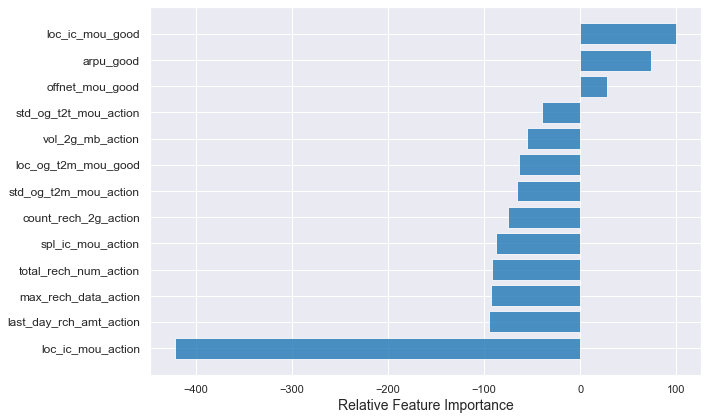

In [367]:
# Plot to show the realtive Importance of each feature in the model 
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.barh(pos, predict1[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[rfe_col].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

### High Performance Model After PCA dimentionality reduction

#### PCA on the data

In [368]:
X_train.shape

(21000, 90)

In [369]:
X_train.columns

Index(['og_others_good', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon',
       'total_data_rech_amt_action', 'avg_tot_rech_amt_good', 'arpu_good',
       'arpu_action', 'arpu_2g_good', 'arpu_2g_action', 'arpu_3g_good',
       'arpu_3g_action', 'count_rech_2g_good', 'count_rech_2g_action',
       'count_rech_3g_good', 'count_rech_3g_action', 'ic_others_good',
       'ic_others_action', 'isd_ic_mou_good', 'isd_ic_mou_action',
       'isd_og_mou_good', 'isd_og_mou_action', 'last_day_rch_amt_good',
       'last_day_rch_amt_action', 'loc_ic_mou_good', 'loc_ic_mou_action',
       'loc_ic_t2f_mou_good', 'loc_ic_t2f_mou_action', 'loc_ic_t2t_mou_good',
       'loc_ic_t2t_mou_action', 'loc_og_mou_good', 'loc_og_mou_action',
       'loc_og_t2c_mou_good', 'loc_og_t2c_mou_action', 'loc_og_t2f_mou_good',
       'loc_og_t2f_mou_action', 'loc_og_t2m_mou_good', 'loc_og_t2m_mou_action',
       'loc_og_t2t_mou_good', 'loc_og_t2t_mou_action

In [370]:
from sklearn.decomposition import PCA

In [371]:
pca = PCA(random_state=42)

In [372]:
pca.fit(X_train)

PCA(random_state=42)

#### Components from the PCA

In [373]:
pca.components_

array([[-4.35388542e-02,  2.90078356e-02,  2.86803231e-02, ...,
         7.50628812e-02,  1.88586856e-01,  1.78485277e-01],
       [-1.18802866e-02, -3.56023953e-04,  3.01226725e-04, ...,
        -2.08164779e-02,  1.06620239e-01,  1.20571209e-01],
       [ 3.80183496e-02,  5.83022087e-02,  6.59153802e-02, ...,
        -3.39244380e-03,  1.39745950e-01,  1.50039332e-01],
       ...,
       [ 1.15183338e-03,  9.19121505e-04, -1.37453154e-03, ...,
         4.57288175e-04, -1.06825360e-03, -9.15170518e-04],
       [-1.06195484e-03,  6.23833959e-04,  8.19713133e-04, ...,
         1.28436248e-03, -1.69110547e-03,  9.89533409e-04],
       [ 1.02419422e-03, -2.51358109e-04,  1.91393217e-04, ...,
         2.58696503e-04, -5.98092600e-04,  6.01618701e-05]])

In [374]:
pca.explained_variance_ratio_

array([1.32126730e-01, 1.12962898e-01, 7.50118313e-02, 5.23627754e-02,
       4.02048313e-02, 3.47260195e-02, 3.29481866e-02, 3.08052420e-02,
       2.75917649e-02, 2.66330436e-02, 2.41561191e-02, 2.09151242e-02,
       2.07891136e-02, 1.90731638e-02, 1.85976037e-02, 1.71314101e-02,
       1.60131827e-02, 1.46608263e-02, 1.43971269e-02, 1.38144133e-02,
       1.33321506e-02, 1.24025783e-02, 1.14793590e-02, 1.00389142e-02,
       9.73382953e-03, 9.50747960e-03, 9.16394826e-03, 8.90604670e-03,
       8.64631728e-03, 8.56379553e-03, 8.35658483e-03, 7.76409697e-03,
       7.21648017e-03, 6.92473570e-03, 6.65582877e-03, 5.93587253e-03,
       5.81430563e-03, 5.42815092e-03, 5.27430953e-03, 5.25027011e-03,
       5.10805971e-03, 4.78219563e-03, 4.66224034e-03, 4.47582890e-03,
       4.11911978e-03, 3.84484094e-03, 3.80564882e-03, 3.71678444e-03,
       3.45096779e-03, 3.32530062e-03, 3.06718261e-03, 3.02628172e-03,
       2.94288015e-03, 2.59072209e-03, 2.52443559e-03, 2.47191162e-03,
      

#### Making a scree plot for the explained variance

In [375]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

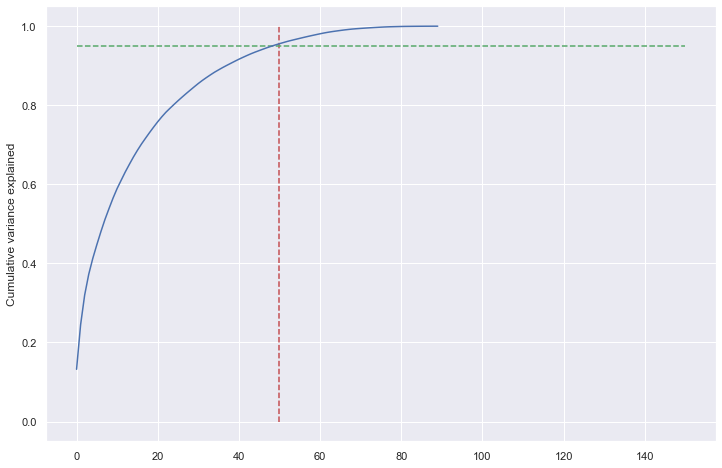

In [376]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

50 principle components are selected after PCA. Creating separate dataframe as df_train_pca and df_test_pca for building models for prediction

In [377]:
from sklearn.decomposition import IncrementalPCA

In [378]:
pca_final = IncrementalPCA(n_components=50)

In [379]:
df_train_pca = pca_final.fit_transform(X_train)

In [380]:
df_train_pca.shape

(21000, 50)

<AxesSubplot:>

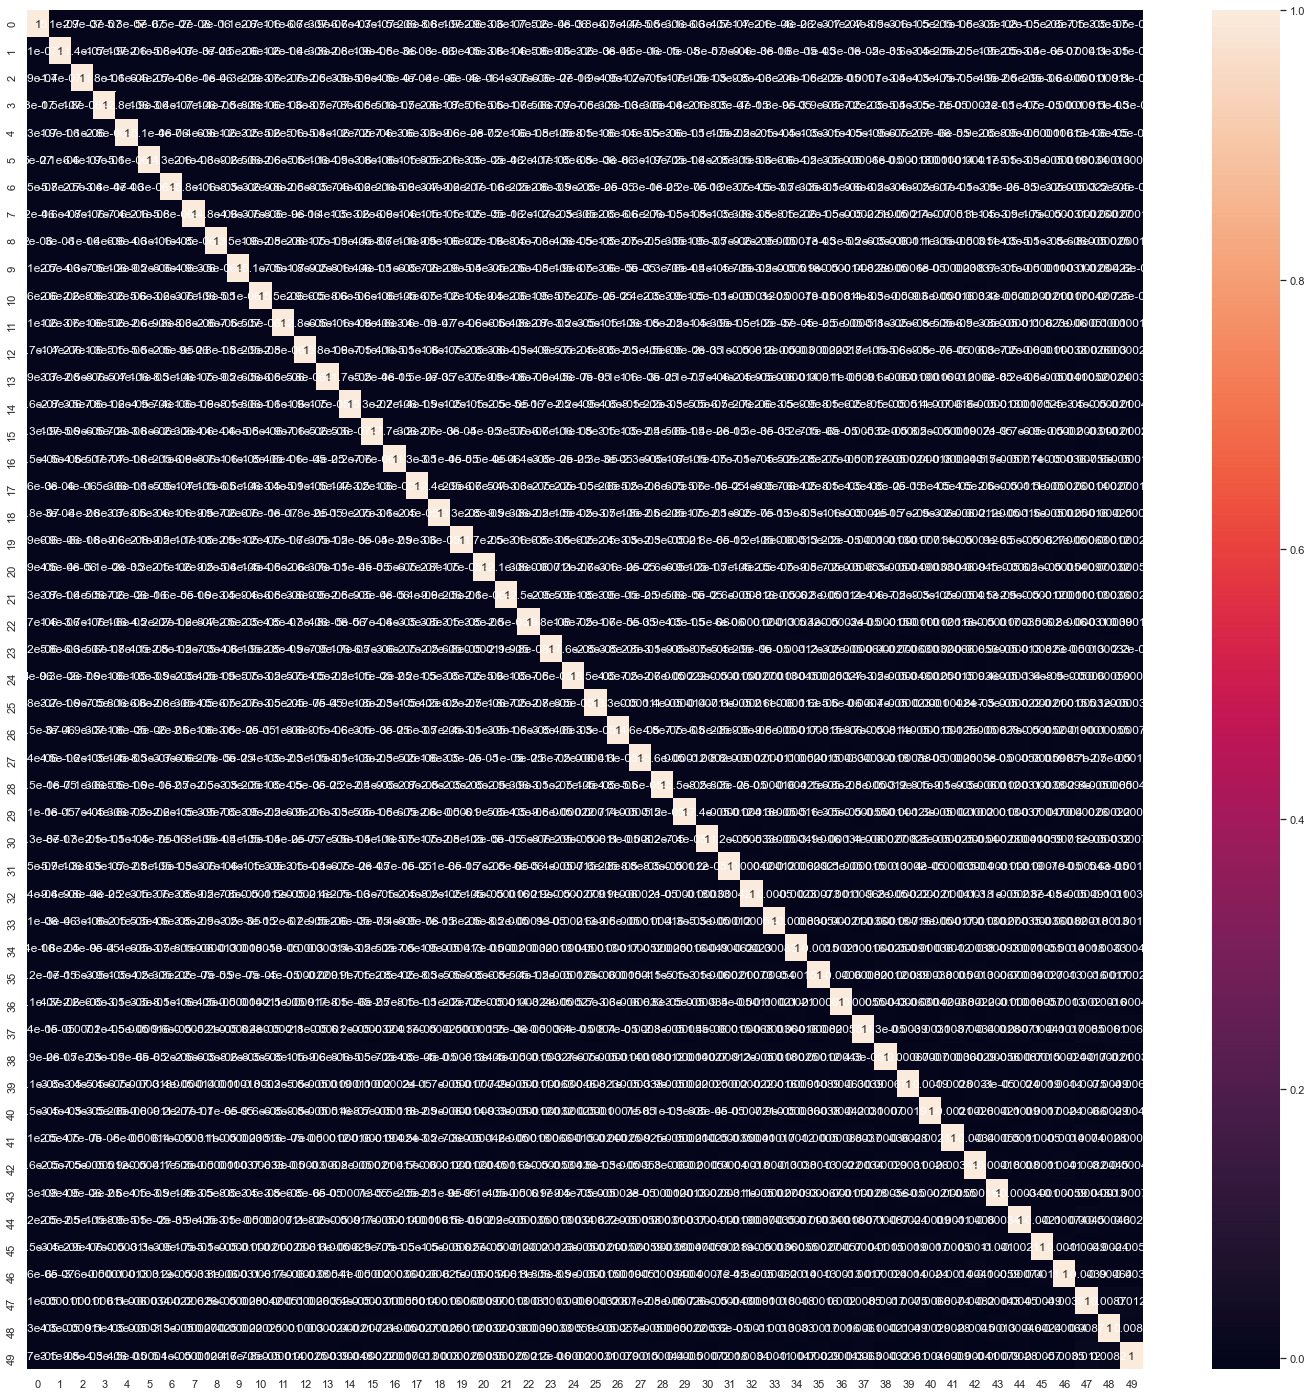

In [381]:
# Checking collinearity between PCA components
corrmat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=[25,25])
sns.heatmap(corrmat, annot=True)

After applying PCA, there are no multi-colinearity issues found

In [382]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 50)

In [383]:
y_test.shape

(9001,)

### Model 1 - Logistic regression after dimentionality reduction using PCA

Including Class Weight to treat the Class imbalance problem and Hyper Parameters to get the good result

In [384]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [385]:
# Initializing grid search with logistics model
grid={"C":np.logspace(0,4,10), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg=LogisticRegression(class_weight='balanced')
logreg_cv=GridSearchCV(logreg,grid,cv=3)

# Fitting the model
model_pca = logreg_cv.fit(df_train_pca, y_train)

In [386]:
print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

Tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}


In [387]:
logreg=LogisticRegression(class_weight='balanced', C=1, penalty= 'l2')

# Fitting the model
model_pca = logreg.fit(df_train_pca, y_train)

In [388]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [389]:
print("Accuracy :",round(logreg_cv.best_score_,2))
print("ROC SCORE:","{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1])))

Accuracy : 0.81
ROC SCORE: 0.9


In [390]:
y_train_pred = model_pca.predict_proba(df_train_pca)[:,1]

In [391]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})

In [392]:
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.675550
1,0,0.088801
2,0,0.320111
3,0,0.000260
4,0,0.076203


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [393]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.675550,1
1,0,0.088801,0
2,0,0.320111,0
3,0,0.000260,0
4,0,0.076203,0


In [394]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[15687  3622]
 [  270  1421]]


In [395]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8146666666666667


In [396]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [397]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8403311649911295

In [398]:
# Let us calculate specificity
TN / float(TN+FP)

0.8124190791858719

##### Plotting ROC Curve

In [399]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

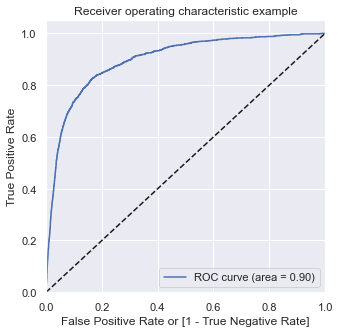

In [400]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

###### Finding Optimal Cutoff Point

In [401]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.675550,1,1,1,1,1,1,1,1,0,0,0
1,0,0.088801,0,1,0,0,0,0,0,0,0,0,0
2,0,0.320111,0,1,1,1,1,0,0,0,0,0,0
3,0,0.000260,0,1,0,0,0,0,0,0,0,0,0
4,0,0.076203,0,1,0,0,0,0,0,0,0,0,0


#####  Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

In [402]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.430286  0.976345  0.382464
0.2   0.2  0.576905  0.952099  0.544047
0.3   0.3  0.676905  0.917800  0.655808
0.4   0.4  0.752238  0.877587  0.741261
0.5   0.5  0.814667  0.840331  0.812419
0.6   0.6  0.862095  0.781786  0.869128
0.7   0.7  0.896429  0.710822  0.912683
0.8   0.8  0.920857  0.593140  0.949557
0.9   0.9  0.926476  0.258427  0.984981


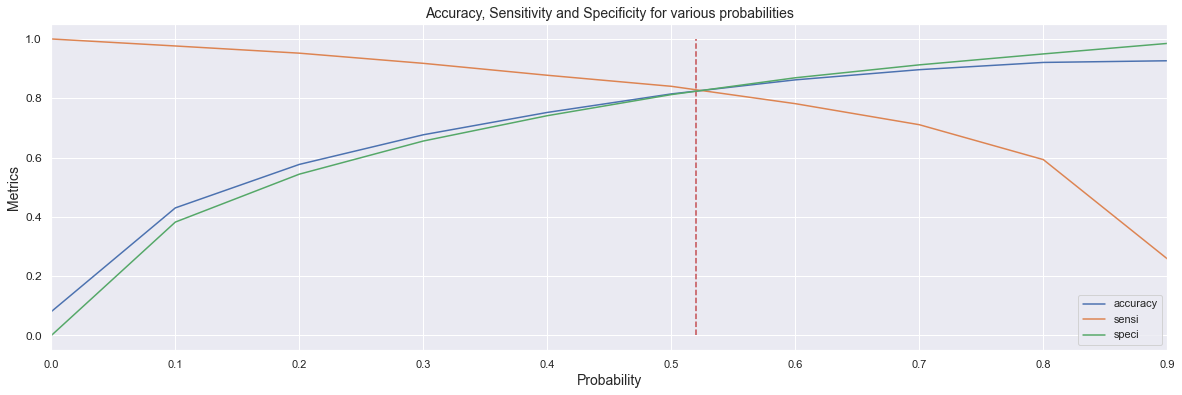

In [403]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(20,6))

##plt.xticks(np.arange(0, 1, step=0.10), size = 12)
plt.yticks(size = 12)
plt.title('Accuracy, Sensitivity and Specificity for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.vlines(x=0.52, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

##### From the curve above, 0.52 is the optimum point to take it as a cutoff probability.

In [404]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.52 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.675550,1,1,1,1,1,1,1,1,0,0,0
1,0,0.088801,0,1,0,0,0,0,0,0,0,0,0
2,0,0.320111,0,1,1,1,1,0,0,0,0,0,0
3,0,0.000260,0,1,0,0,0,0,0,0,0,0,0
4,0,0.076203,0,1,0,0,0,0,0,0,0,0,0


In [405]:
# Let's check the overall accuracy.
print("Accuracy:",metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

Accuracy: 0.8255238095238095


In [406]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print("CONFUSION MATRIX:")
print(confusion2)

CONFUSION MATRIX:
[[15927  3382]
 [  282  1409]]


In [407]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [408]:
# Let's see the sensitivity of our logistic regression model
print("SENSIVITY:",TP / float(TP+FN))

SENSIVITY: 0.8332347723240686


In [409]:
# Let us calculate specificity
print("SPECIFICITY:",TN / float(TN+FP))

SPECIFICITY: 0.8248485162359521


#### Making predictions on the test set

In [410]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]

In [411]:
pred_probs_test.shape

(9001,)

In [412]:
pred_probs_test_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':pred_probs_test})
pred_probs_test_final.head()

,Churn,Churn_Prob
0,1,0.630251
1,1,0.465561
2,0,0.059545
3,0,0.319808
4,1,0.853614


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.2 based on the cuttoff chosen in the training data else 0

In [413]:
pred_probs_test_final['predicted'] = pred_probs_test_final.Churn_Prob.map(lambda x: 1 if x > 0.2 else 0)

# Let's see the head
pred_probs_test_final.head()

,Churn,Churn_Prob,predicted
0,1,0.630251,1
1,1,0.465561,1
2,0,0.059545,0
3,0,0.319808,1
4,1,0.853614,1


In [414]:
# Confusion matrix 
confusion = metrics.confusion_matrix(pred_probs_test_final.Churn, pred_probs_test_final.predicted )
print(confusion)

[[4556 3695]
 [  47  703]]


In [415]:
# Let's check the overall accuracy.
acc = round(metrics.accuracy_score(pred_probs_test_final.Churn, pred_probs_test_final.predicted),2)
print('Accuracy=',acc)

Accuracy= 0.58


In [416]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [417]:
# Let's see the sensitivity of our logistic regression model
sen = round(TP / float(TP+FN),2)
print('Sensitivity=',sen)

Sensitivity= 0.94


In [418]:
# Let us calculate specificity
spe = round(TN / float(TN+FP),2)
print('Specificity=',spe)

Specificity= 0.55


In [419]:
# Let us calculate ROC_AUC_Score
roc = round(metrics.roc_auc_score(pred_probs_test_final.Churn, pred_probs_test_final.predicted),2)
print("ROC_AUC_Score=",roc )

ROC_AUC_Score= 0.74


In [420]:
results = pd.DataFrame({'Model':['Logistic Regression'], 'Accuracy': [acc], 'Sensitivity': [sen], 'Specificity':[spe],'ROC_AUC_Score':[roc]})
results

,Model,Accuracy,Sensitivity,Specificity,ROC_AUC_Score
0,Logistic Regression,0.58,0.94,0.55,0.74


### Model 2 - Random Forest after dimentionality reduction using PCA

In [421]:
from sklearn.ensemble import RandomForestClassifier

In [422]:
t = time.localtime()
before_rs = time.strftime("%H:%M:%S", t)
print(before_rs)

16:31:41


In [423]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(2, 20, 5),
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300]    
}
# Create a based model
rf = RandomForestClassifier(class_weight="balanced",random_state = 42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [424]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 11.3min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5),
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [425]:
# printing the optimal accuracy score and hyperparameters
print('Accuracy : ',grid_search.best_score_,'using',grid_search.best_params_)

Accuracy :  0.879 using {'max_depth': 17, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [426]:
t = time.localtime()
after_rs = time.strftime("%H:%M:%S", t)
print(after_rs)

16:43:36


In [427]:
##### Fitting the final model with the best parameters obtained from grid search

In [428]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=17,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             n_estimators=200,
                            n_jobs=-1, class_weight="balanced",random_state = 42)
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=17,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=200, n_jobs=-1, random_state=42)

#### Making predictions on the test set

In [429]:
# predict
predictions = rfc.predict(df_test_pca)

In [430]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8251
           1       0.41      0.75      0.53       750

    accuracy                           0.89      9001
   macro avg       0.69      0.82      0.73      9001
weighted avg       0.93      0.89      0.90      9001



In [431]:
# Let's check the overall accuracy.
acc = round(metrics.accuracy_score(y_test,predictions),2)
print('Accuracy=',acc)

Accuracy= 0.89


In [432]:
confusion = confusion_matrix(y_test,predictions)
print(confusion)

[[7432  819]
 [ 189  561]]


In [433]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [434]:
# Let's see the sensitivity of our Random Forest model
sen = round(TP / float(TP+FN),2)
print('Sensitivity=',sen)

Sensitivity= 0.75


In [435]:
# Let us calculate specificity
spe = round(TN / float(TN+FP),2)
print('Specificity=',spe)

Specificity= 0.9


In [436]:
# Let us calculate ROC_AUC_Score
roc = round(metrics.roc_auc_score(y_test,predictions),2)
print("ROC_AUC_Score=",roc )

ROC_AUC_Score= 0.82


In [437]:
tempresults = pd.DataFrame({'Model':['Random forest'], 'Accuracy': [acc], 'Sensitivity': [sen], 'Specificity':[spe],'ROC_AUC_Score':[roc]})
results = pd.concat([results, tempresults])
results

,Model,Accuracy,Sensitivity,Specificity,ROC_AUC_Score
0,Logistic Regression,0.58,0.94,0.55,0.74
0,Random forest,0.89,0.75,0.90,0.82


The sensitivity of Random forest model is low as compared to logistics model.

### Model 3 - XG Boost after dimentionality reduction using PCA

In [442]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables

In [443]:
t = time.localtime()
before_xg = time.strftime("%H:%M:%S", t)
print(before_xg)

16:47:03


In [445]:
model = XGBClassifier()
model.fit(df_train_pca, y_train)

[16:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [446]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(df_test_pca)

# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 89.43%


##### Hyperparameter tuning using k-fold CV and adding parameter for class imbalance

In [447]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {"max_depth" : [2, 5],
              "n_estimators": [200, 400, 600],
              'scale_pos_weight':[8,12,14]
             }       


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(df_train_pca, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[16:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[16:47:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:56:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:56:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:57:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 26.1min finished


[17:13:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [448]:
# printing the optimal accuracy score and hyperparameters
print('Accuracy :',model_cv.best_score_,'using',model_cv.best_params_)

Accuracy : 0.8864581604692567 using {'max_depth': 2, 'n_estimators': 200, 'scale_pos_weight': 8}


In [449]:
t = time.localtime()
after_xg = time.strftime("%H:%M:%S", t)
print(after_xg)

17:14:08


In [450]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

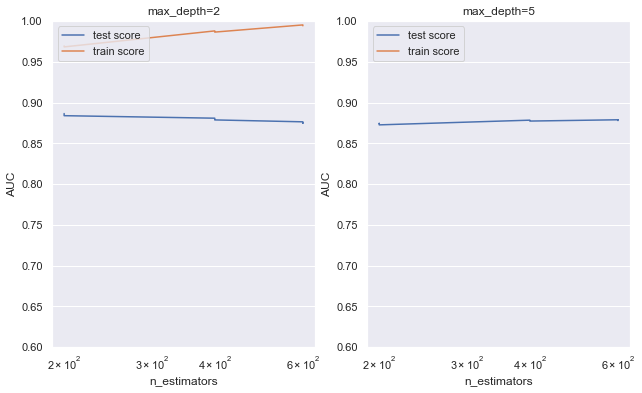

In [451]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {"max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]} 


for n, depth in enumerate(param_grid['max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [452]:
# fit model on training data with best hyperparameters
# model = XGBClassifier(params)
model = XGBClassifier(max_depth=2,n_estimators=200,scale_pos_weight=8)
model.fit(df_train_pca, y_train)

[17:14:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=8, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [453]:
y_train_pred = model.predict_proba(df_train_pca)[:,1]

##### Create dataframe y_train_pred_final to store Churn probability

In [454]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.498285
1,0,0.207993
2,0,0.185921
3,0,0.004419
4,0,0.139786


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [455]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.498285,0
1,0,0.207993,0
2,0,0.185921,0
3,0,0.004419,0
4,0,0.139786,0


In [456]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print("CONFUSION MATRIX:");
print(confusion)

CONFUSION MATRIX:
[[17507  1802]
 [  228  1463]]


In [457]:
# Let's check the overall accuracy.
print("ACCURACY OF MODEL:",metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

ACCURACY OF MODEL: 0.9033333333333333


In [458]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [459]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity:",round((TP / float(TP+FN)),2))

Sensitivity: 0.87


In [460]:
# Let us calculate specificity
print("Specificity:",round((TN / float(TN+FP)),2))

Specificity: 0.91


In [461]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

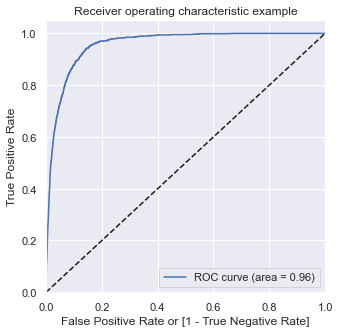

In [462]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### Finding Optimal Cutoff Point

In [463]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.498285,0,1,1,1,1,1,0,0,0,0,0
1,0,0.207993,0,1,1,1,0,0,0,0,0,0,0
2,0,0.185921,0,1,1,0,0,0,0,0,0,0,0
3,0,0.004419,0,1,0,0,0,0,0,0,0,0,0
4,0,0.139786,0,1,1,0,0,0,0,0,0,0,0


In [464]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.609619  0.994086  0.575949
0.2   0.2  0.763571  0.981076  0.744523
0.3   0.3  0.836952  0.960378  0.826143
0.4   0.4  0.876476  0.917209  0.872909
0.5   0.5  0.903333  0.865169  0.906676
0.6   0.6  0.921619  0.800710  0.932208
0.7   0.7  0.932524  0.726789  0.950541
0.8   0.8  0.942762  0.615021  0.971464
0.9   0.9  0.937286  0.326434  0.990782


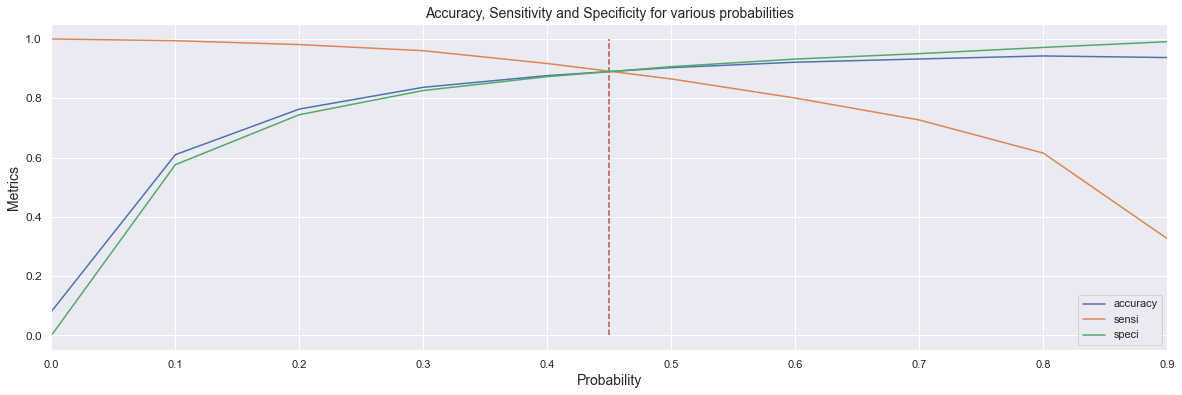

In [465]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(20,6))

##plt.xticks(np.arange(0, 1, step=0.10), size = 12)
plt.yticks(size = 12)
plt.title('Accuracy, Sensitivity and Specificity for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.vlines(x=0.45, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

In [466]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.498285,1,1,1,1,1,1,0,0,0,0,0
1,0,0.207993,0,1,1,1,0,0,0,0,0,0,0
2,0,0.185921,0,1,1,0,0,0,0,0,0,0,0
3,0,0.004419,0,1,0,0,0,0,0,0,0,0,0
4,0,0.139786,0,1,1,0,0,0,0,0,0,0,0


In [467]:
# Let's check the overall accuracy.
print("Model Accuracy:",round((metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)),2))

Model Accuracy: 0.89


In [468]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print("Confision Matrix");
confusion2

Confision Matrix


array([[17215,  2094],
       [  180,  1511]], dtype=int64)

In [469]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [470]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity with cutt off ", (TP / float(TP+FN)))

Sensitivity with cutt off  0.8935541099940864


In [471]:
# Let us calculate specificity
print("Specificity with cutt off",(TN / float(TN+FP)))

Specificity with cutt off 0.8915531617380497


##### Making Prediction on Test Data

In [472]:
pred_probs_test = model.predict_proba(df_test_pca)[:,1]

In [473]:
pred_probs_test.shape

(9001,)

In [474]:
pred_probs_test_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':pred_probs_test})
pred_probs_test_final.head()

,Churn,Churn_Prob
0,1,0.424595
1,1,0.251165
2,0,0.274382
3,0,0.053198
4,1,0.592044


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.45 else 0

In [475]:
pred_probs_test_final['predicted'] = pred_probs_test_final.Churn_Prob.map(lambda x: 1 if x > 0.2 else 0)

# Let's see the head
pred_probs_test_final.head()
pred_probs_test_final[pred_probs_test_final.Churn!=pred_probs_test_final.predicted].count()

Churn         2186
Churn_Prob    2186
predicted     2186
dtype: int64

In [476]:
# Confusion matrix 
confusion = metrics.confusion_matrix(pred_probs_test_final.Churn, pred_probs_test_final.predicted )
print(confusion)

[[6152 2099]
 [  87  663]]


In [477]:
# Let's check the overall accuracy.
acc = round(metrics.accuracy_score(pred_probs_test_final.Churn, pred_probs_test_final.predicted),2)
print('Accuracy=',acc)

Accuracy= 0.76


In [478]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [479]:
# Let's see the sensitivity of our logistic regression model
sen = round(TP / float(TP+FN),2)
print('Sensitivity=',sen)

Sensitivity= 0.88


In [480]:
# Let us calculate specificity
spe = round(TN / float(TN+FP),2)
print('Specificity=',spe)

Specificity= 0.75


In [481]:
# Let us calculate ROC_AUC_Score
roc = round(metrics.roc_auc_score(pred_probs_test_final.Churn, pred_probs_test_final.predicted),2)
print("ROC_AUC_Score=",roc )

ROC_AUC_Score= 0.81


In [482]:
tempresults = pd.DataFrame({'Model':['XG Boost'], 'Accuracy': [acc], 'Sensitivity': [sen], 'Specificity':[spe],'ROC_AUC_Score':[roc]})
results = pd.concat([results, tempresults])


## Summary 

### The Important features that are strong predictors of churn are follows from Interpretable model using Logistic Regression

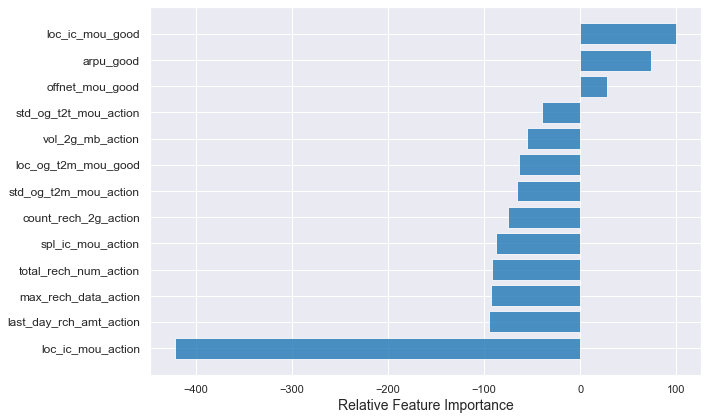

In [483]:
# Plot to show the realtive Importance of each feature in the model 
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.barh(pos, predict1[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[rfe_col].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

##### These features has strong postive coeffients loc_ic_mou_good, arpu_good, offnet_mou_good and others have the negative coeefients. From these features identified, it will be easy to predict whether the High Value Customer will Churn or not in near feature and these features may also indicate why customers choose to switch to other networks.

## The Summary of results from the Model after dimentionality reduction through PCA

In [484]:
results = results.reset_index(drop=True)
results

,Model,Accuracy,Sensitivity,Specificity,ROC_AUC_Score
0,Logistic Regression,0.58,0.94,0.55,0.74
1,Random forest,0.89,0.75,0.90,0.82
2,XG Boost,0.76,0.88,0.75,0.81


##### After viewing the summary, the model built from Logistic Regression provides good result when comparing with Sensitivity factor.